In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD003.csv")


# Understanding the dataset

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (24720, 27)


In [4]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  -0.0005   0.0004    100.0   518.67   642.36  1583.23   
1       1       2   0.0008  -0.0003    100.0   518.67   642.50  1584.69   
2       1       3  -0.0014  -0.0002    100.0   518.67   642.18  1582.35   
3       1       4  -0.0020   0.0001    100.0   518.67   642.92  1585.61   
4       1       5   0.0016   0.0000    100.0   518.67   641.68  1588.63   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1396.84    14.62  ...   2388.01   8145.32    8.4246      0.03       391   
1  1396.89    14.62  ...   2388.03   8152.85    8.4403      0.03       392   
2  1405.61    14.62  ...   2388.00   8150.17    8.3901      0.03       391   
3  1392.27    14.62  ...   2388.08   8146.56    8.3878      0.03       392   
4  1397.65    14.62  ...   2388.03   8147.80    8.3869      0.03       392   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [5]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [6]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            24720 non-null  int64  
 1   Cycles            24720 non-null  int64  
 2   Sensor1           24720 non-null  float64
 3   Sensor2           24720 non-null  float64
 4   Sensor3           24720 non-null  float64
 5   Sensor4           24720 non-null  float64
 6   Sensor5           24720 non-null  float64
 7   Sensor6           24720 non-null  float64
 8   Sensor7           24720 non-null  float64
 9   Sensor8           24720 non-null  float64
 10  Sensor9           24720 non-null  float64
 11  Sensor10          24720 non-null  float64
 12  Sensor11          24720 non-null  float64
 13  Sensor12          24720 non-null  float64
 14  Sensor13          24720 non-null  float64
 15  Sensor14          24720 non-null  float64
 16  Sensor15          24720 non-null  float6

In [7]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2  Sensor3  \
count  24720.000000  24720.000000  24720.000000  24720.000000  24720.0   
mean      48.631877    139.077063     -0.000024      0.000005    100.0   
std       29.348985     98.846675      0.002194      0.000294      0.0   
min        1.000000      1.000000     -0.008600     -0.000600    100.0   
25%       23.000000     62.000000     -0.001500     -0.000200    100.0   
50%       47.000000    124.000000     -0.000000     -0.000000    100.0   
75%       74.000000    191.000000      0.001500      0.000300    100.0   
max      100.000000    525.000000      0.008600      0.000700    100.0   

        Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  ...  \
count  24720.00  24720.000000  24720.000000  24720.000000  2.472000e+04  ...   
mean     518.67    642.457858   1588.079175   1404.471212  1.462000e+01  ...   
std        0.00      0.523031      6.810418      9.773178  3.552786e-

# Data visualization

In [8]:
# Remove constant sensors
constant_sensors = [col for col in data.columns[2:-1] if data[col].nunique() == 1]
print(f"Constant sensors: {constant_sensors}")
data = data.drop(columns=constant_sensors)


Constant sensors: ['Sensor3', 'Sensor4', 'Sensor8', 'Sensor19', 'Sensor21', 'Sensor22']


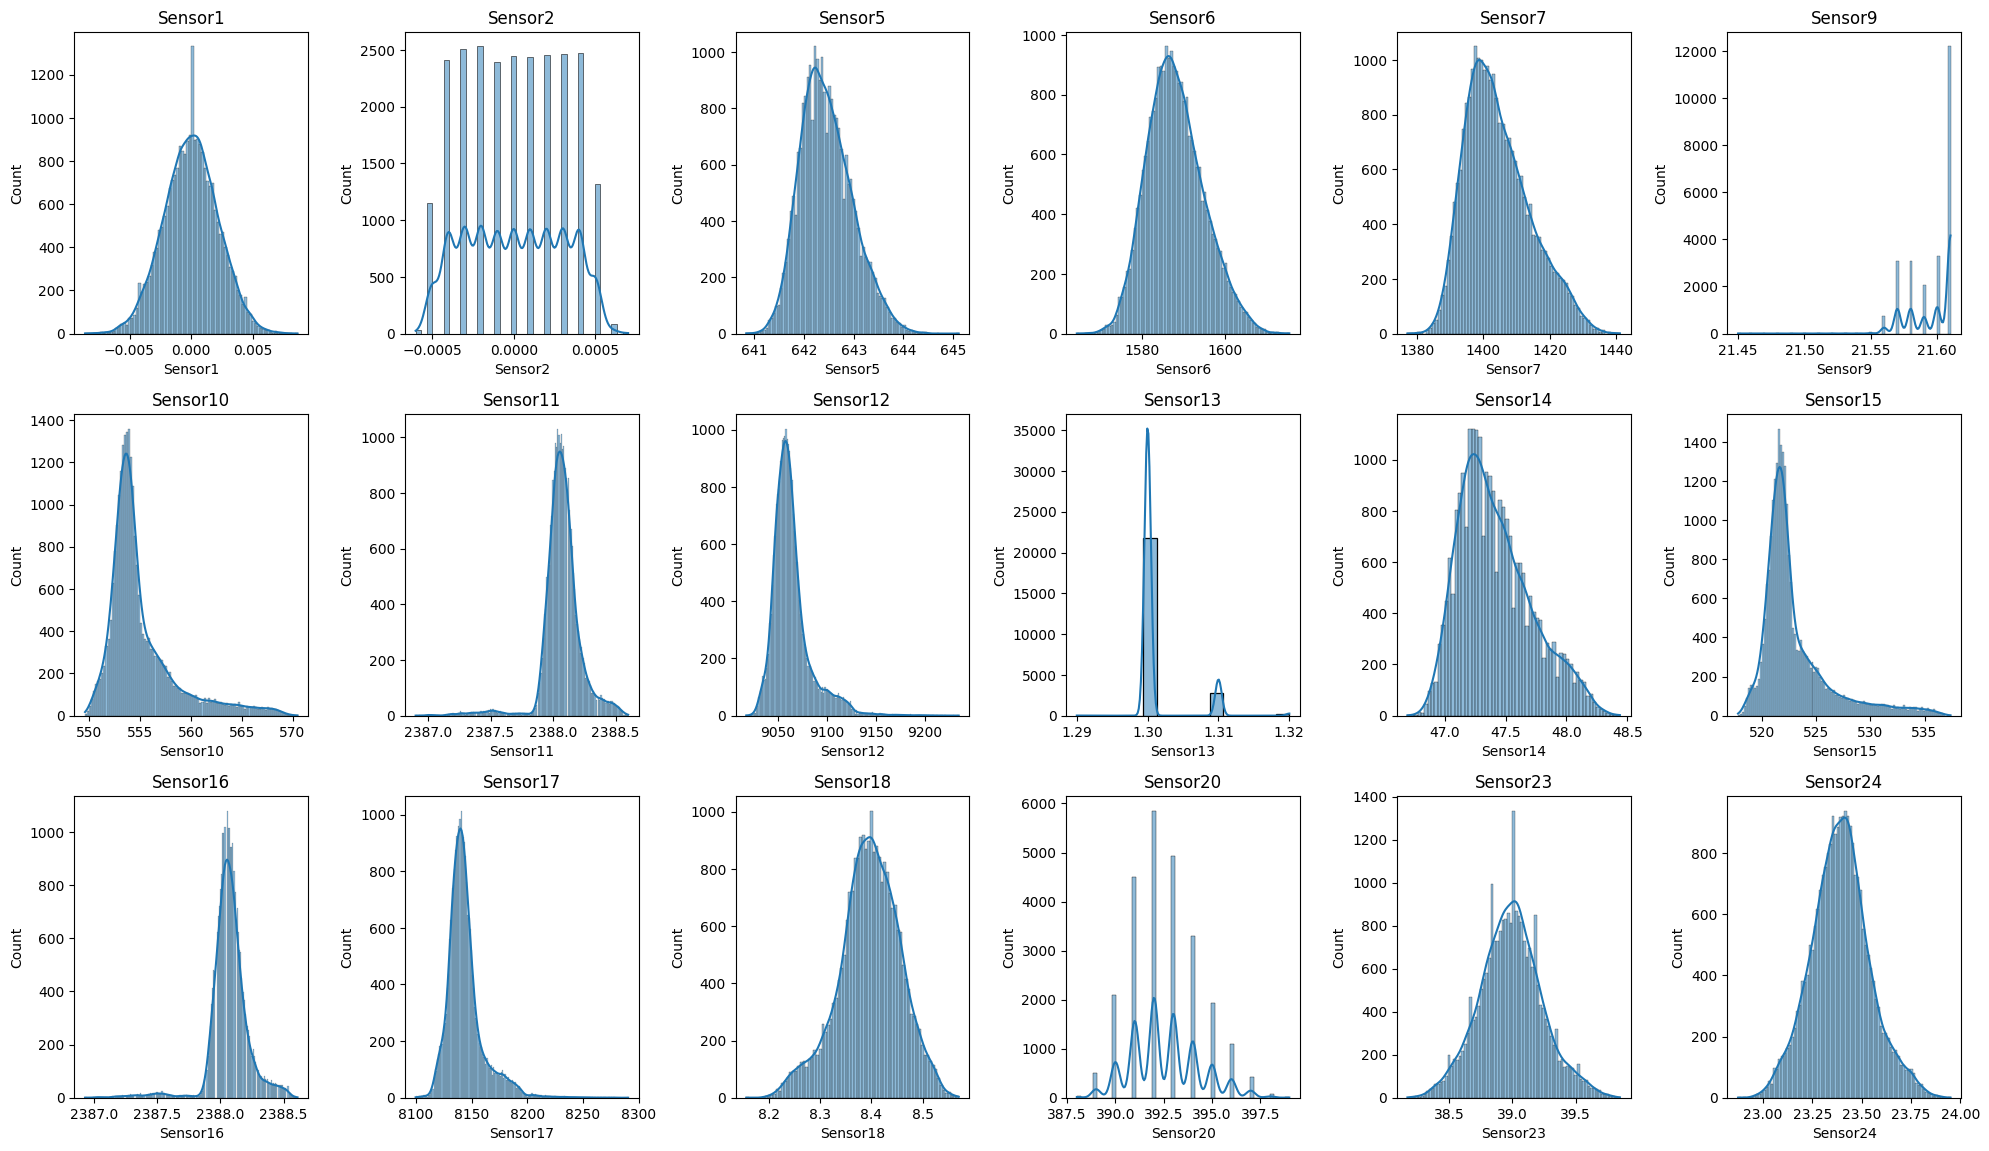

In [9]:
# Histograms for sensors
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[2:-1]):
    plt.subplot(4, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

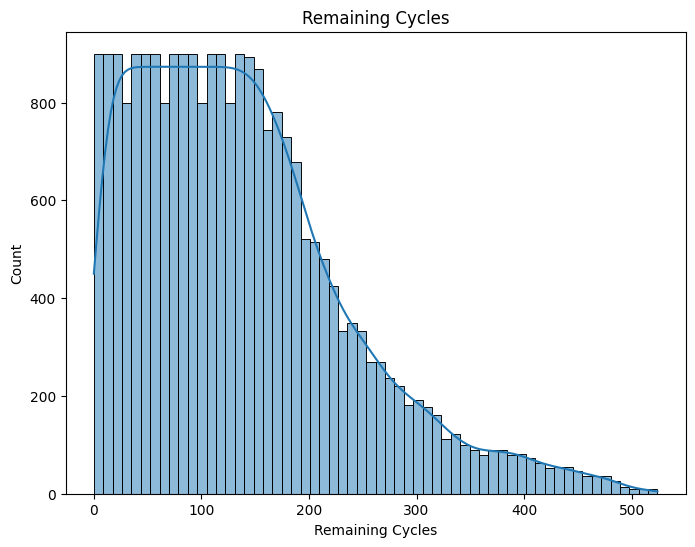

In [10]:
# Histogram for Remainig Cycles
plt.figure(figsize=(8, 6))
sns.histplot(data['Remaining Cycles'], kde=True)
plt.title('Remaining Cycles')
plt.show()

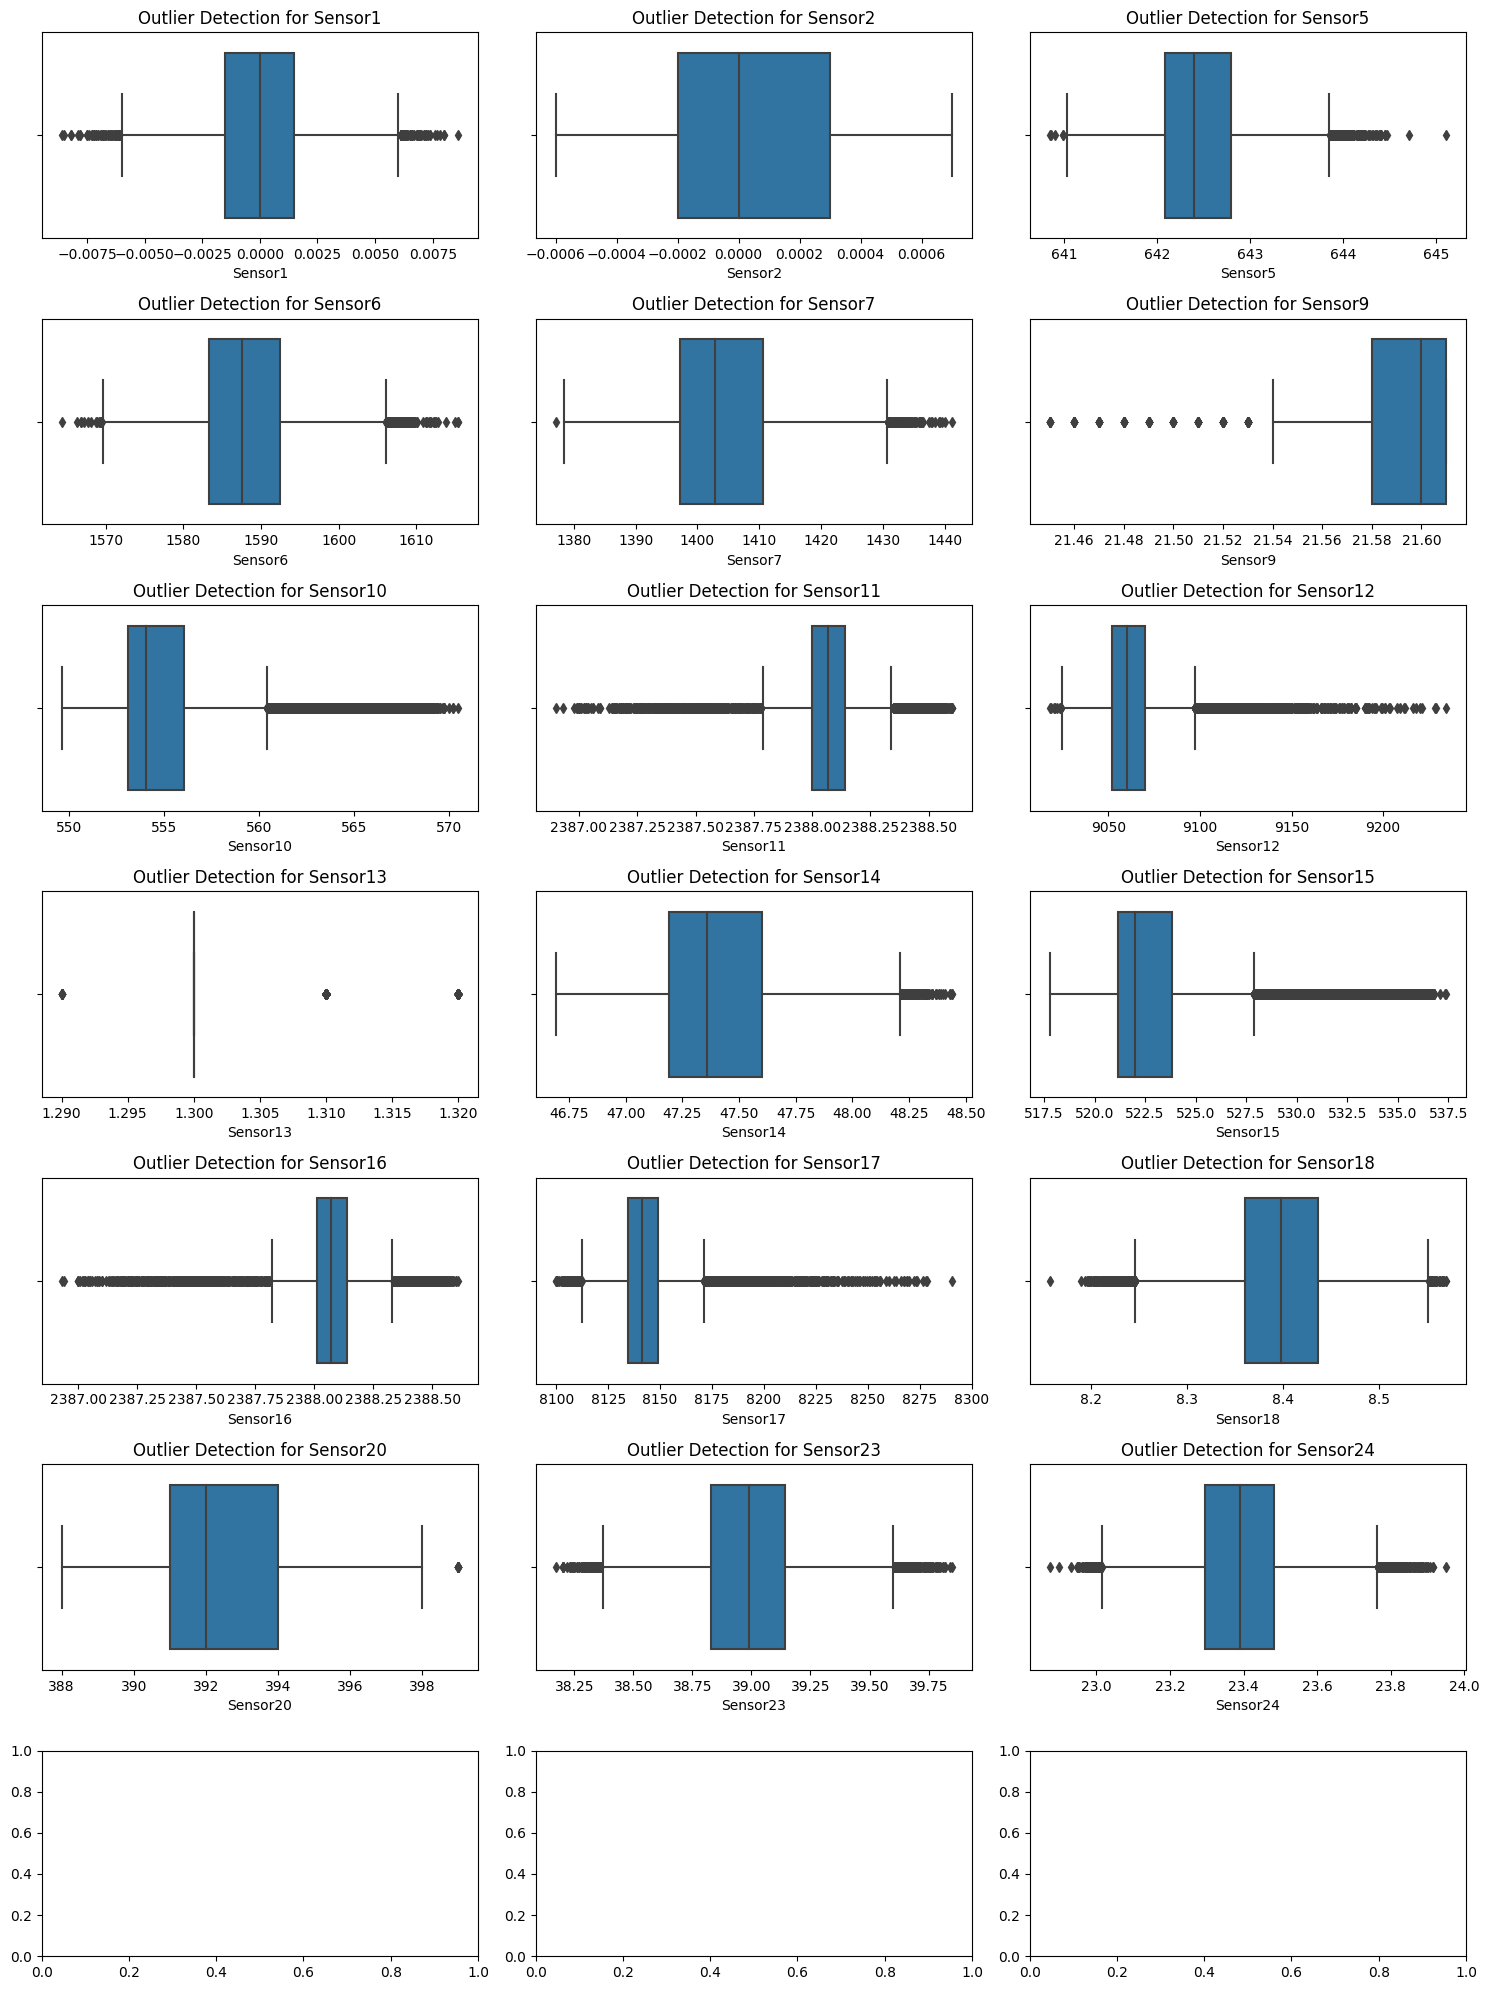

In [11]:
# Boxplots for sensors
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()
for i, col in enumerate(data.columns[2:-1]):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")
plt.tight_layout()
plt.show()

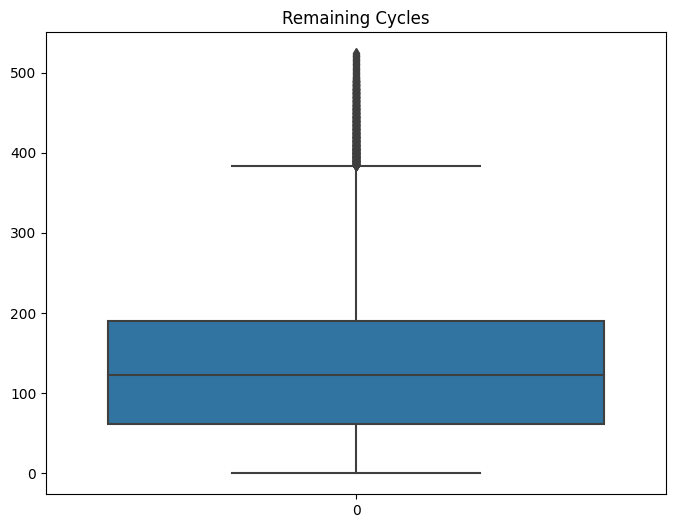

In [12]:
# Boxplot for Remaining Cycles
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Remaining Cycles'])
plt.title('Remaining Cycles')
plt.show()

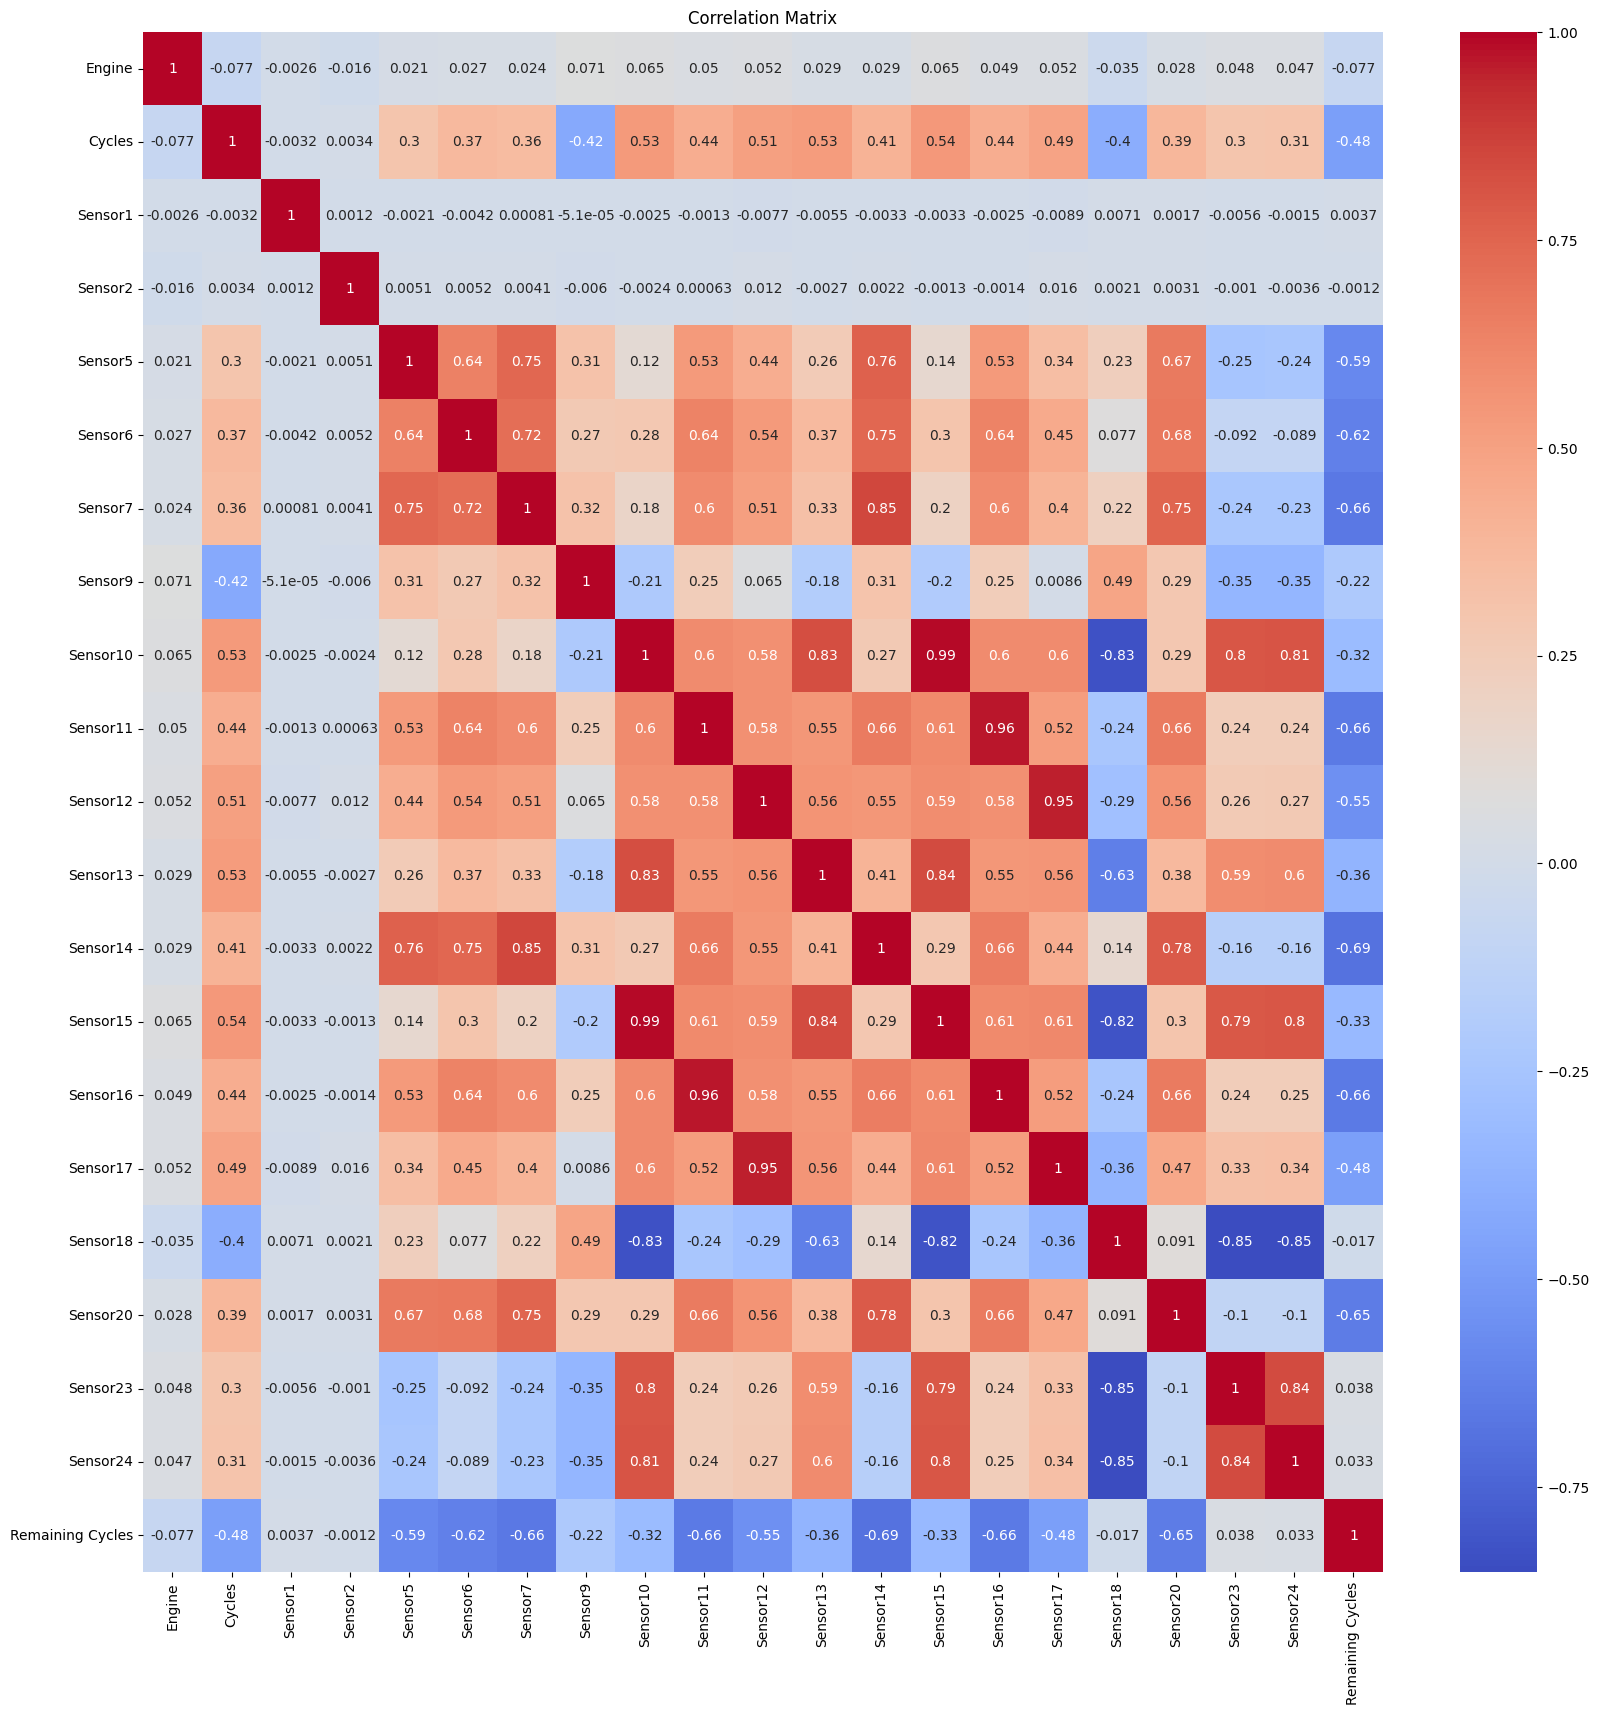

In [13]:
# Correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

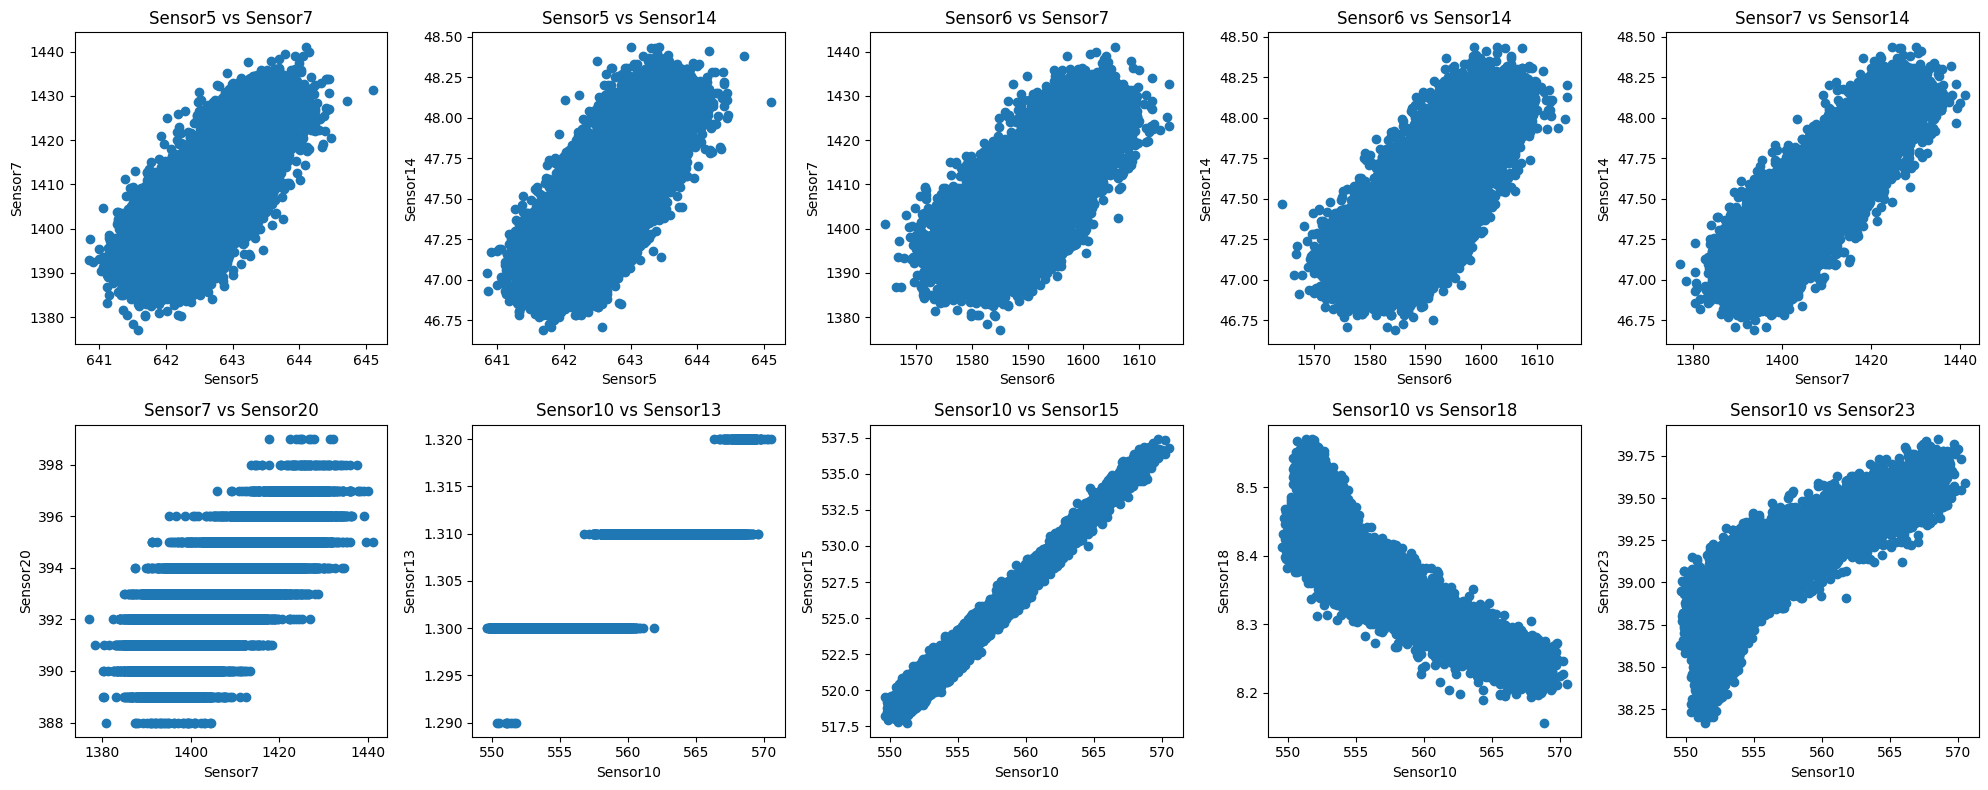

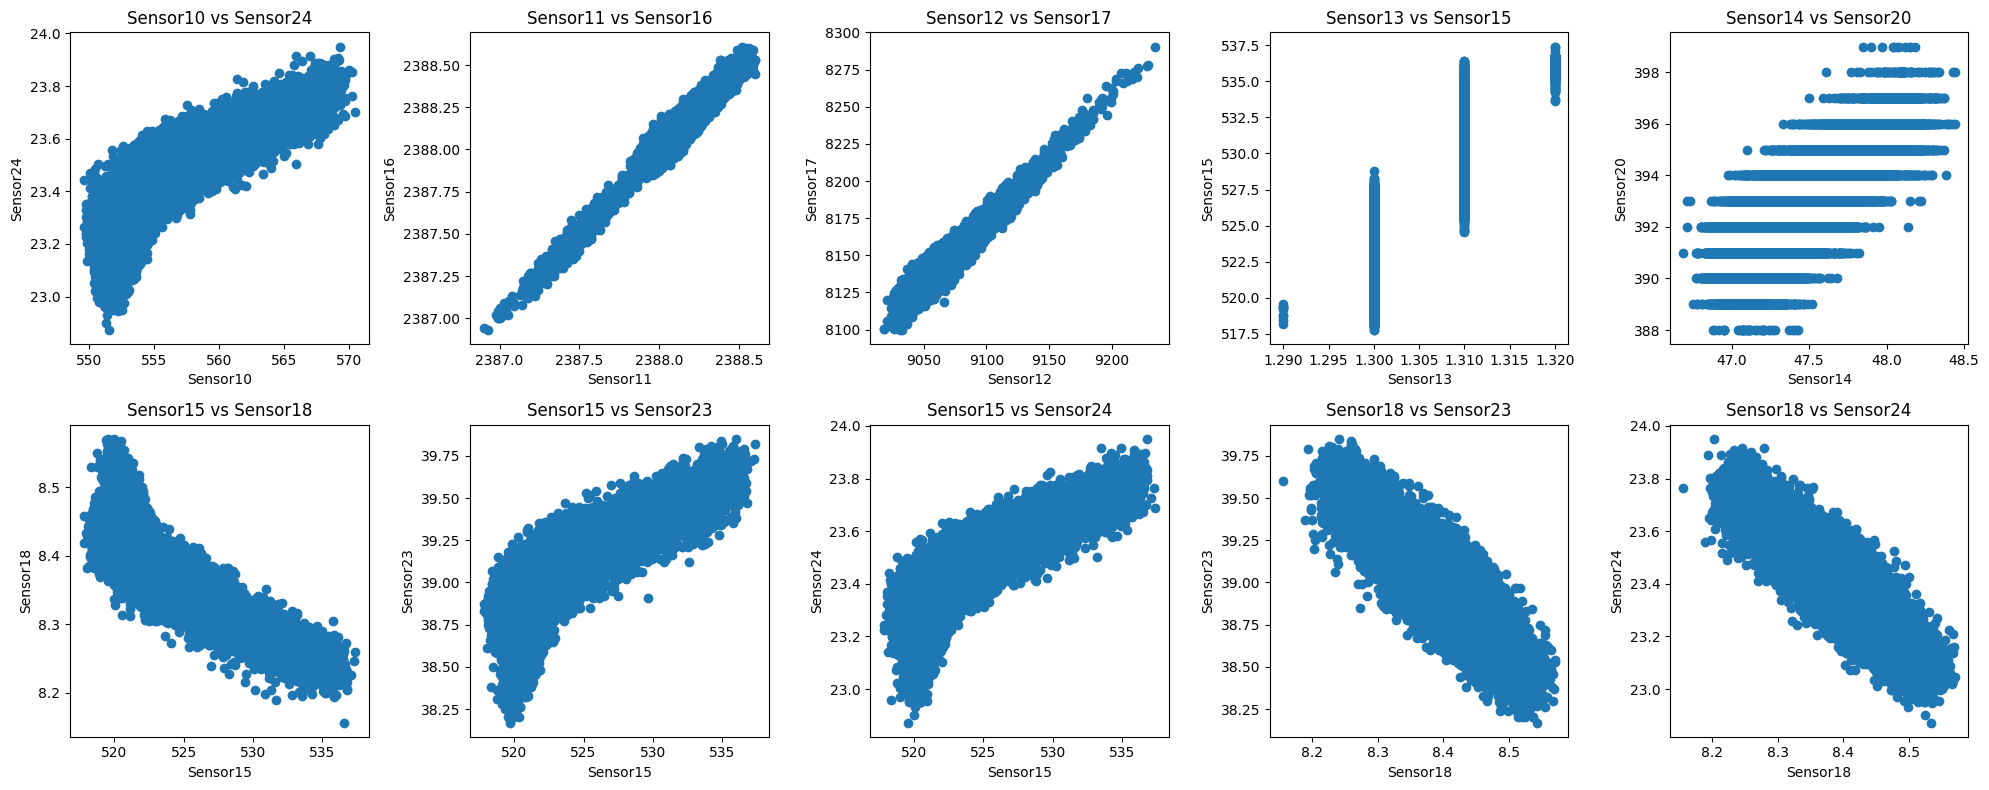

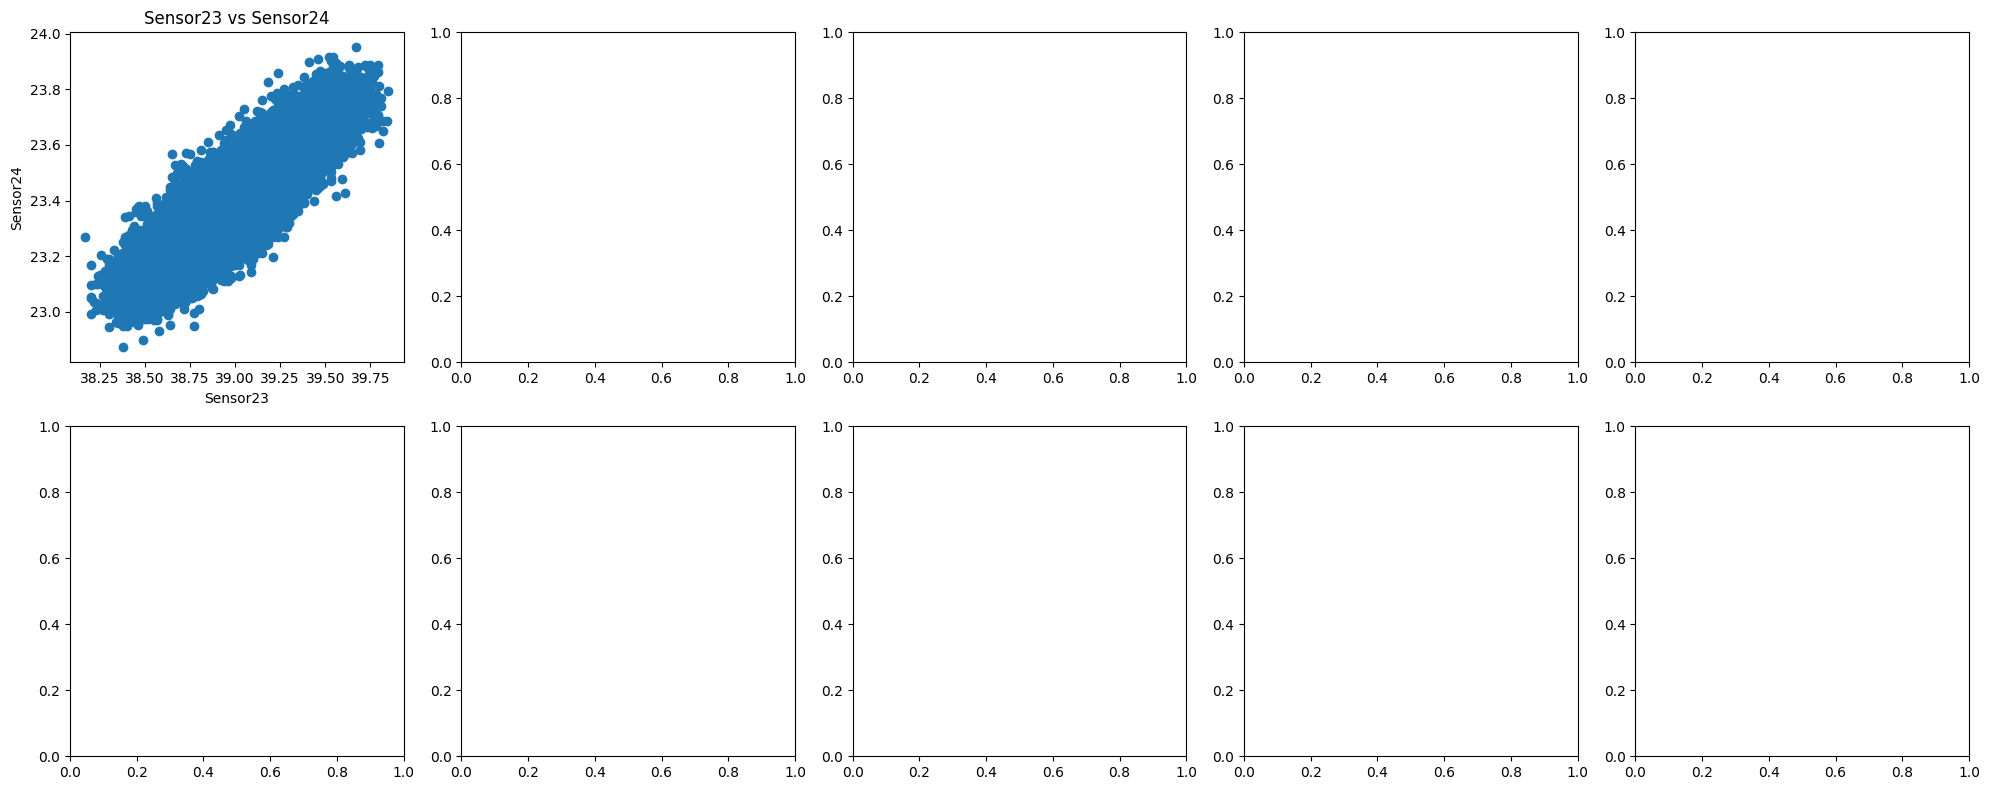

In [14]:
# Scatter plots for bivariate analysis based on Correlation Matrix Value.
corr_matrix = data.corr()
threshold = 0.7
sensors = data.columns[2:-1]  

# Pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = []
for pair in pairs:
    if pair[::-1] not in selected_pairs:
        selected_pairs.append(pair)

# Scatter plots for sensor pairs
for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)
    plt.tight_layout()
    plt.show()

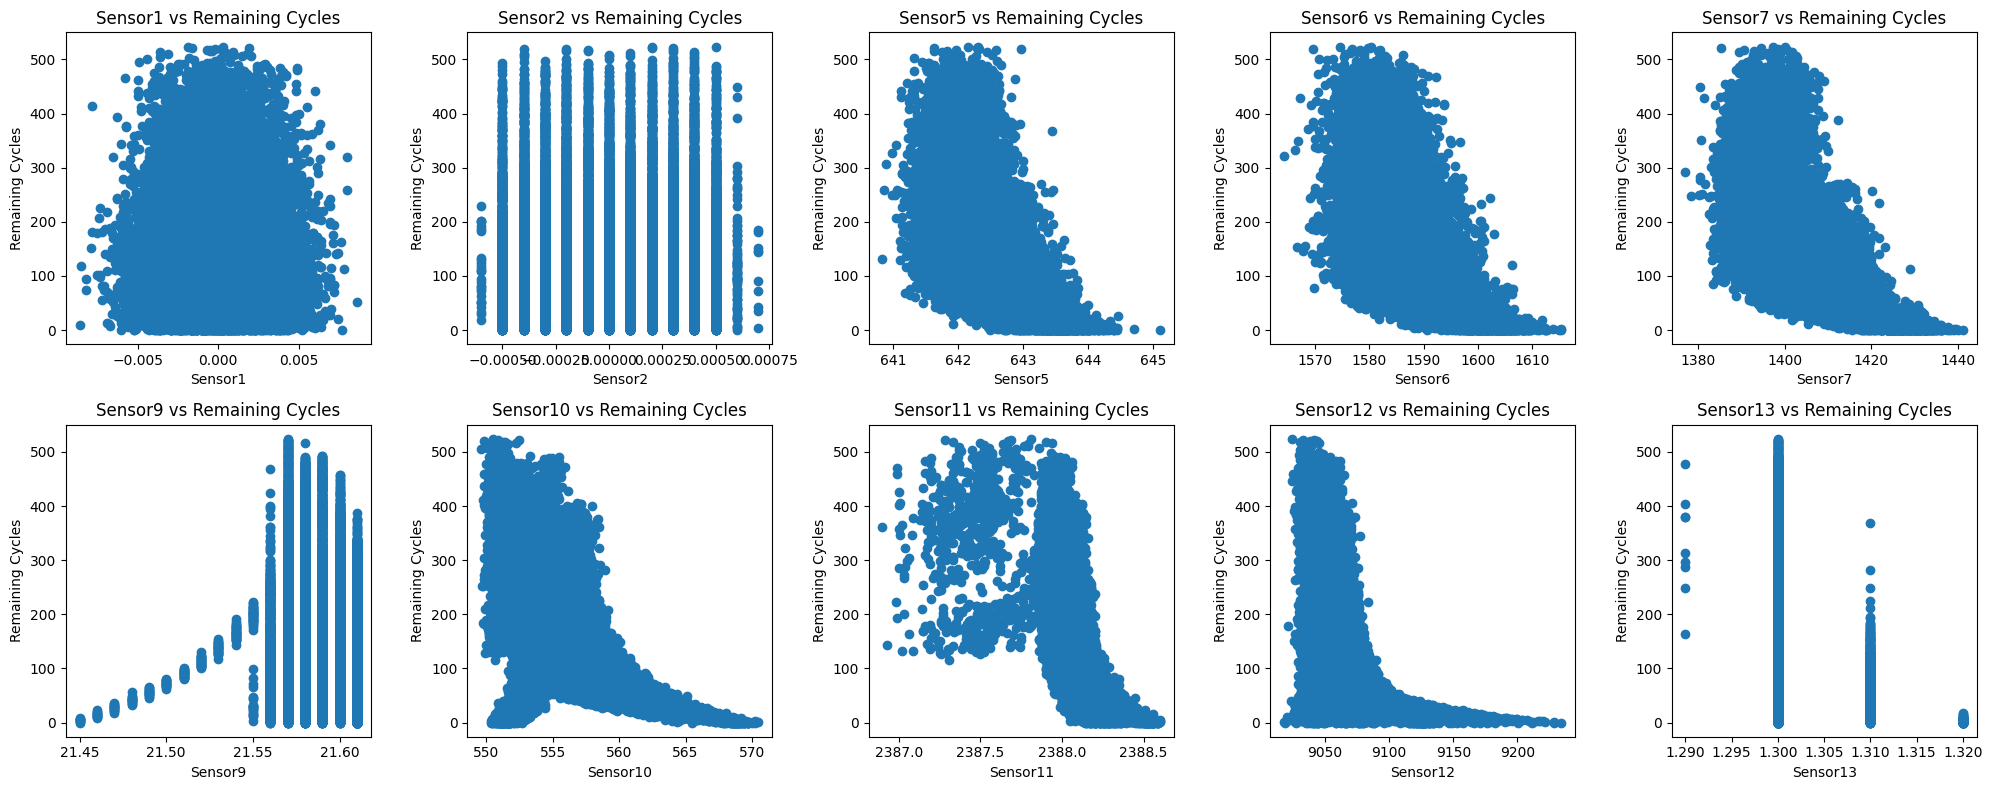

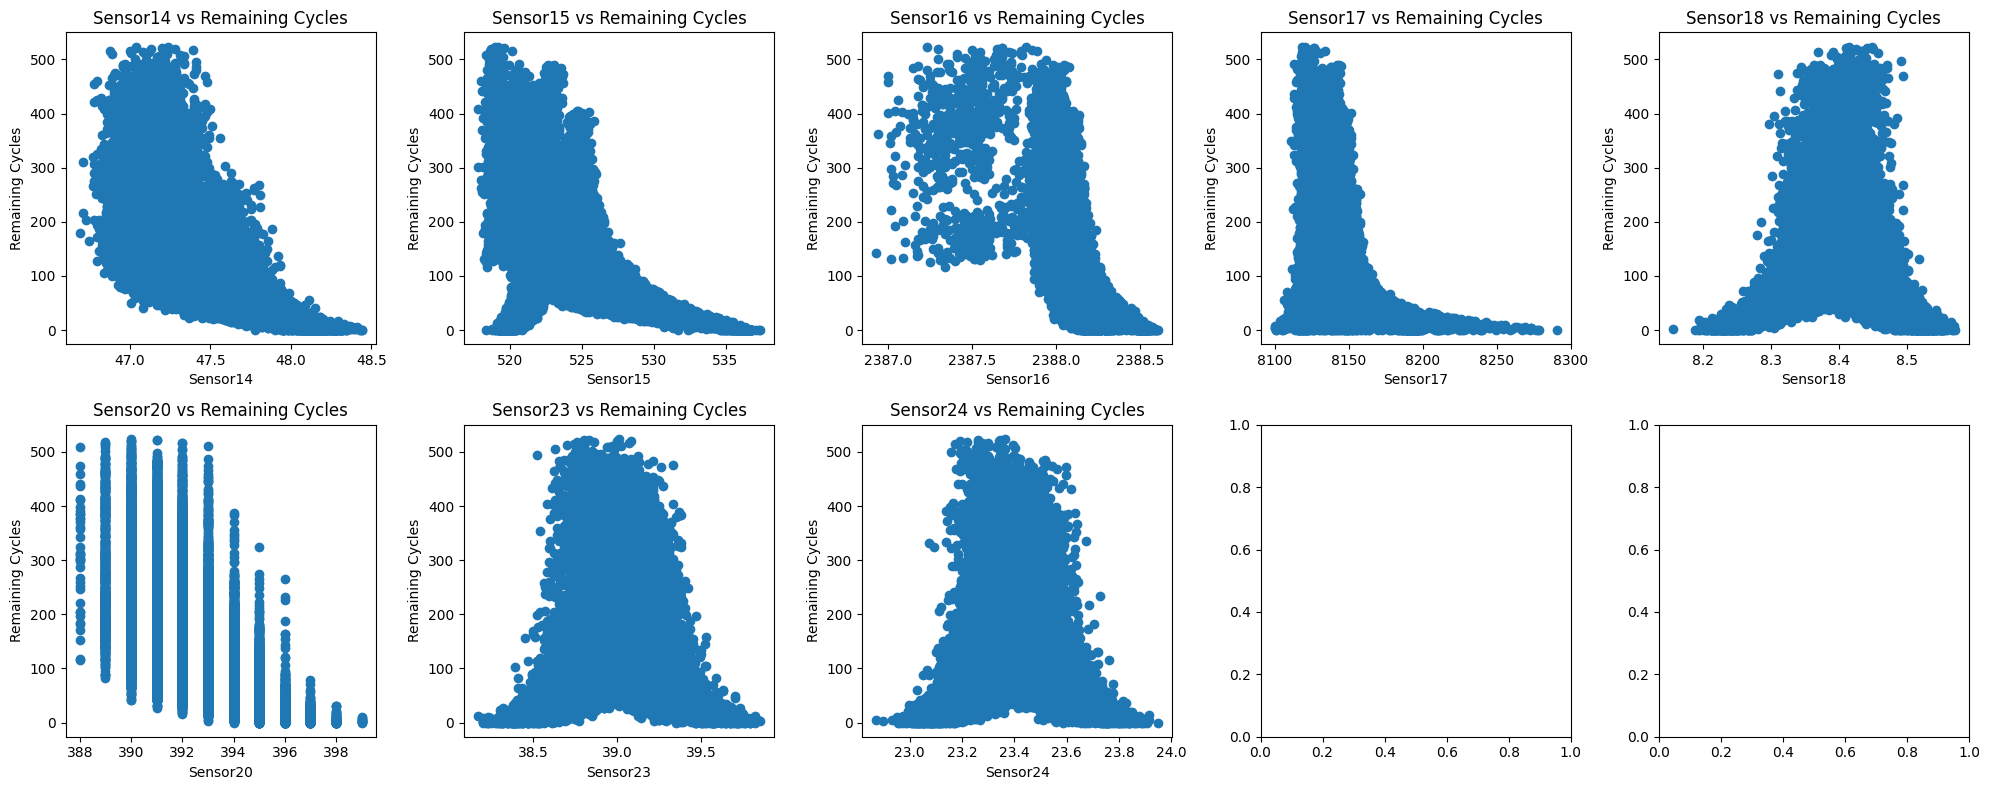

In [15]:
# Scatter plots for sensors vs remaining cycles
for j in range(0, len(sensors), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, sensor in enumerate(sensors[j:j+10]):
        axs[i].scatter(data[sensor], data['Remaining Cycles'])
        axs[i].set_title(f'{sensor} vs Remaining Cycles')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel('Remaining Cycles')
    plt.tight_layout()
    plt.show()

Group: Remaining Cycles = 0, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  247.20000   -0.000052   -0.000008  643.597200  1603.373100   
std     29.011492   86.48384    0.002109    0.000296    0.381803     3.952464   
min      1.000000  145.00000   -0.005200   -0.000500  642.710000  1595.190000   
25%     25.750000  189.75000   -0.001500   -0.000225  643.390000  1600.377500   
50%     50.500000  220.50000   -0.000100    0.000000  643.590000  1603.355000   
75%     75.250000  279.75000    0.001100    0.000225  643.825000  1605.940000   
max    100.000000  525.00000    0.007700    0.000500  645.110000  1612.730000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1428.910400   21.598900  559.057700  2388.379500  ...    1.308200   
st

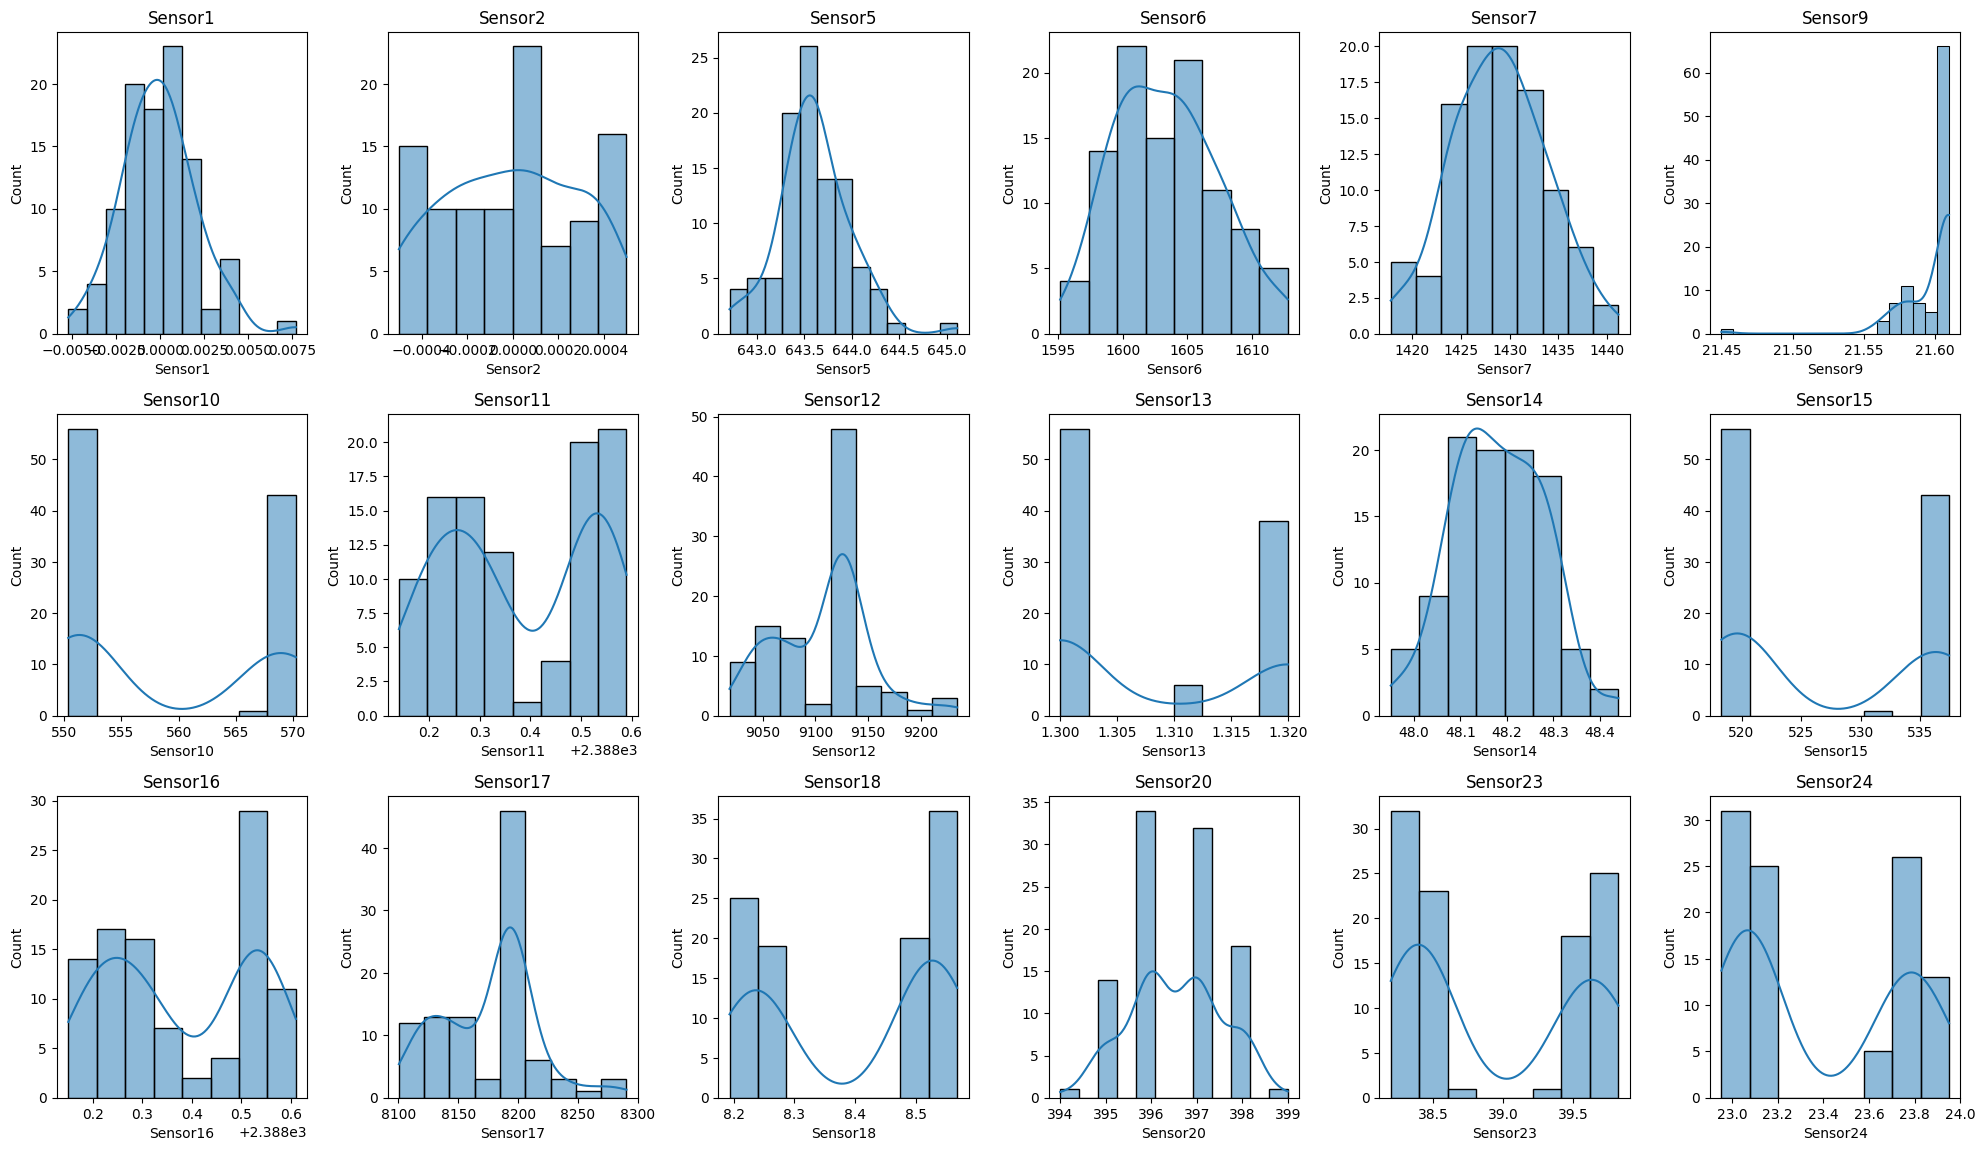

Enter 'c' to continue, 'q' to quit exploring group 0: c
Group: Remaining Cycles = 1, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  246.20000   -0.000116    0.000023  643.555300  1602.357700   
std     29.011492   86.48384    0.002320    0.000297    0.391736     4.375815   
min      1.000000  144.00000   -0.006000   -0.000500  642.490000  1590.610000   
25%     25.750000  188.75000   -0.001750   -0.000200  643.275000  1599.170000   
50%     50.500000  219.50000   -0.000300    0.000050  643.545000  1602.090000   
75%     75.250000  278.75000    0.001375    0.000300  643.820000  1605.087500   
max    100.000000  524.00000    0.005200    0.000600  644.450000  1615.390000   

          Sensor7    Sensor9   Sensor10     Sensor11  ...    Sensor13  \
count   100.00000  100.00000  100.00000   100.000000  ...  100.000000   
mean   1427.32890   21.59840

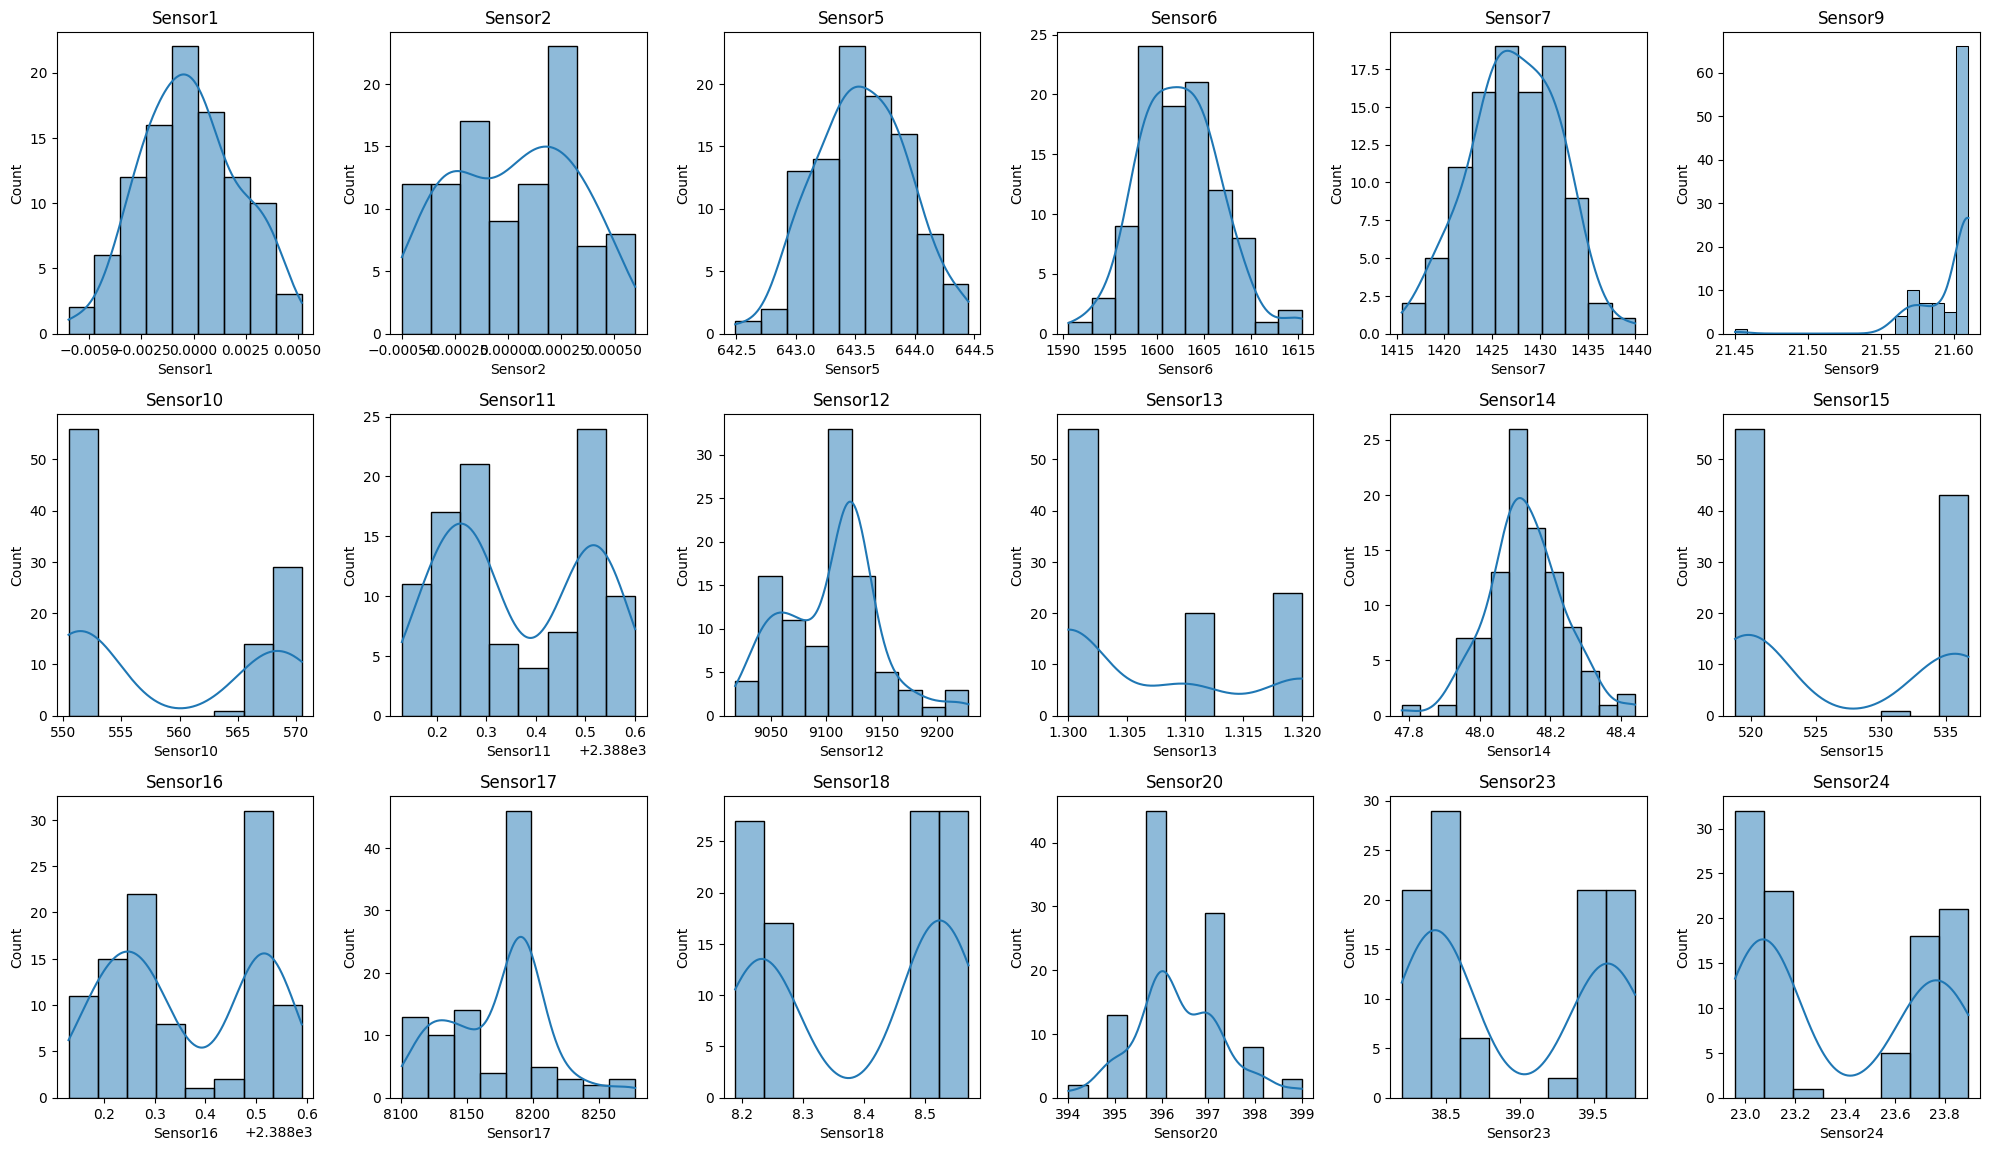

Enter 'c' to continue, 'q' to quit exploring group 1: c
Group: Remaining Cycles = 2, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  245.20000   -0.000149    0.000037  643.479700  1602.355100   
std     29.011492   86.48384    0.002190    0.000278    0.394358     4.247805   
min      1.000000  143.00000   -0.005100   -0.000500  642.510000  1594.380000   
25%     25.750000  187.75000   -0.001800   -0.000200  643.222500  1598.877500   
50%     50.500000  218.50000    0.000100    0.000100  643.485000  1602.080000   
75%     75.250000  277.75000    0.001400    0.000300  643.702500  1605.035000   
max    100.000000  523.00000    0.005200    0.000500  644.710000  1615.390000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1427.280700   2

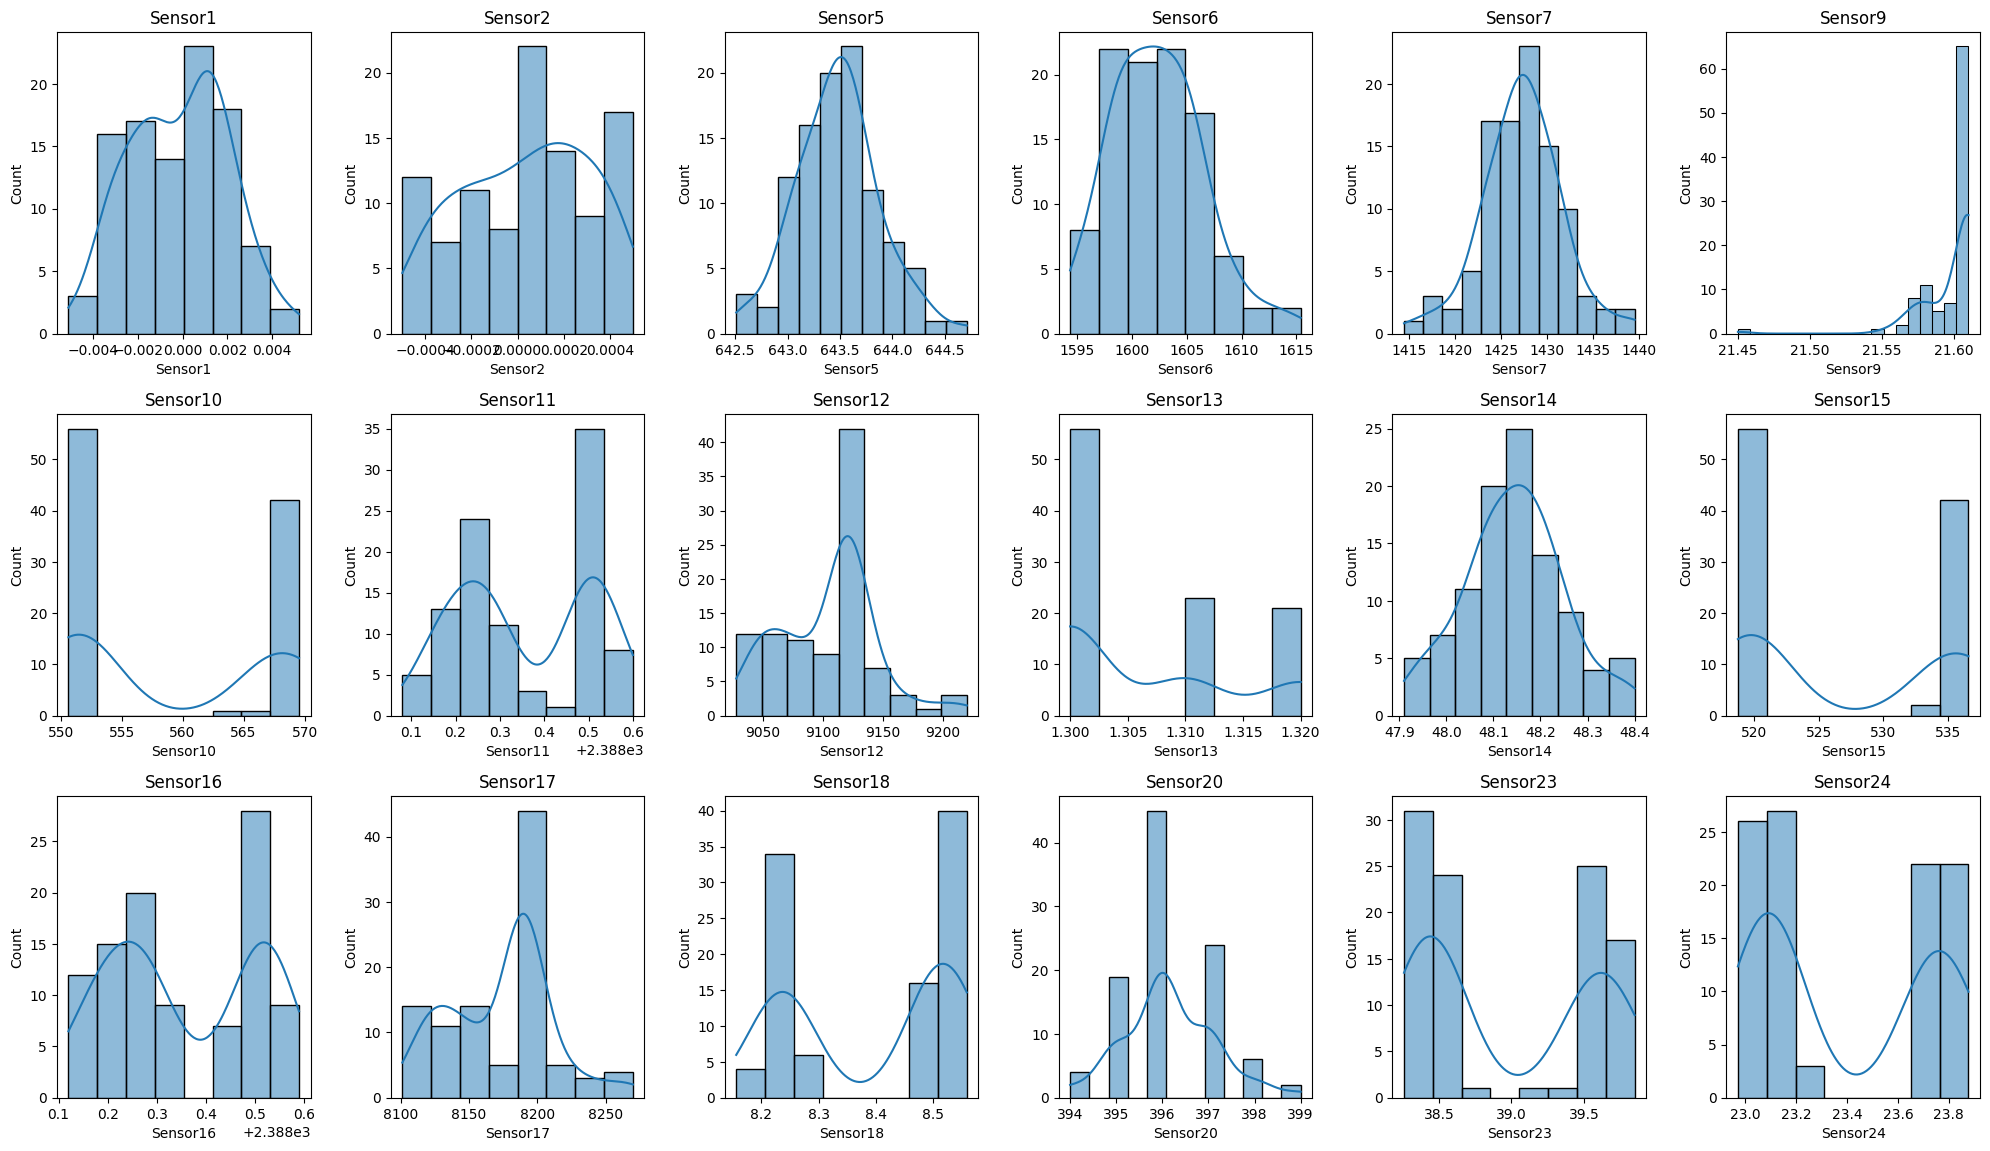

Enter 'c' to continue, 'q' to quit exploring group 2: c
Group: Remaining Cycles = 3, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5     Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.00000   
mean    50.500000  244.20000    0.000013    0.000002  643.471200  1601.22950   
std     29.011492   86.48384    0.002077    0.000269    0.369571     4.40256   
min      1.000000  142.00000   -0.004200   -0.000500  642.620000  1588.32000   
25%     25.750000  186.75000   -0.001400   -0.000200  643.212500  1598.52500   
50%     50.500000  217.50000    0.000050    0.000000  643.470000  1600.81000   
75%     75.250000  276.75000    0.001150    0.000200  643.742500  1604.49250   
max    100.000000  522.00000    0.006000    0.000700  644.450000  1611.63000   

          Sensor7     Sensor9    Sensor10     Sensor11  ...   Sensor13  \
count   100.00000  100.000000  100.000000   100.000000  ...  100.00000   
mean   1426.24010   21.598600  558.

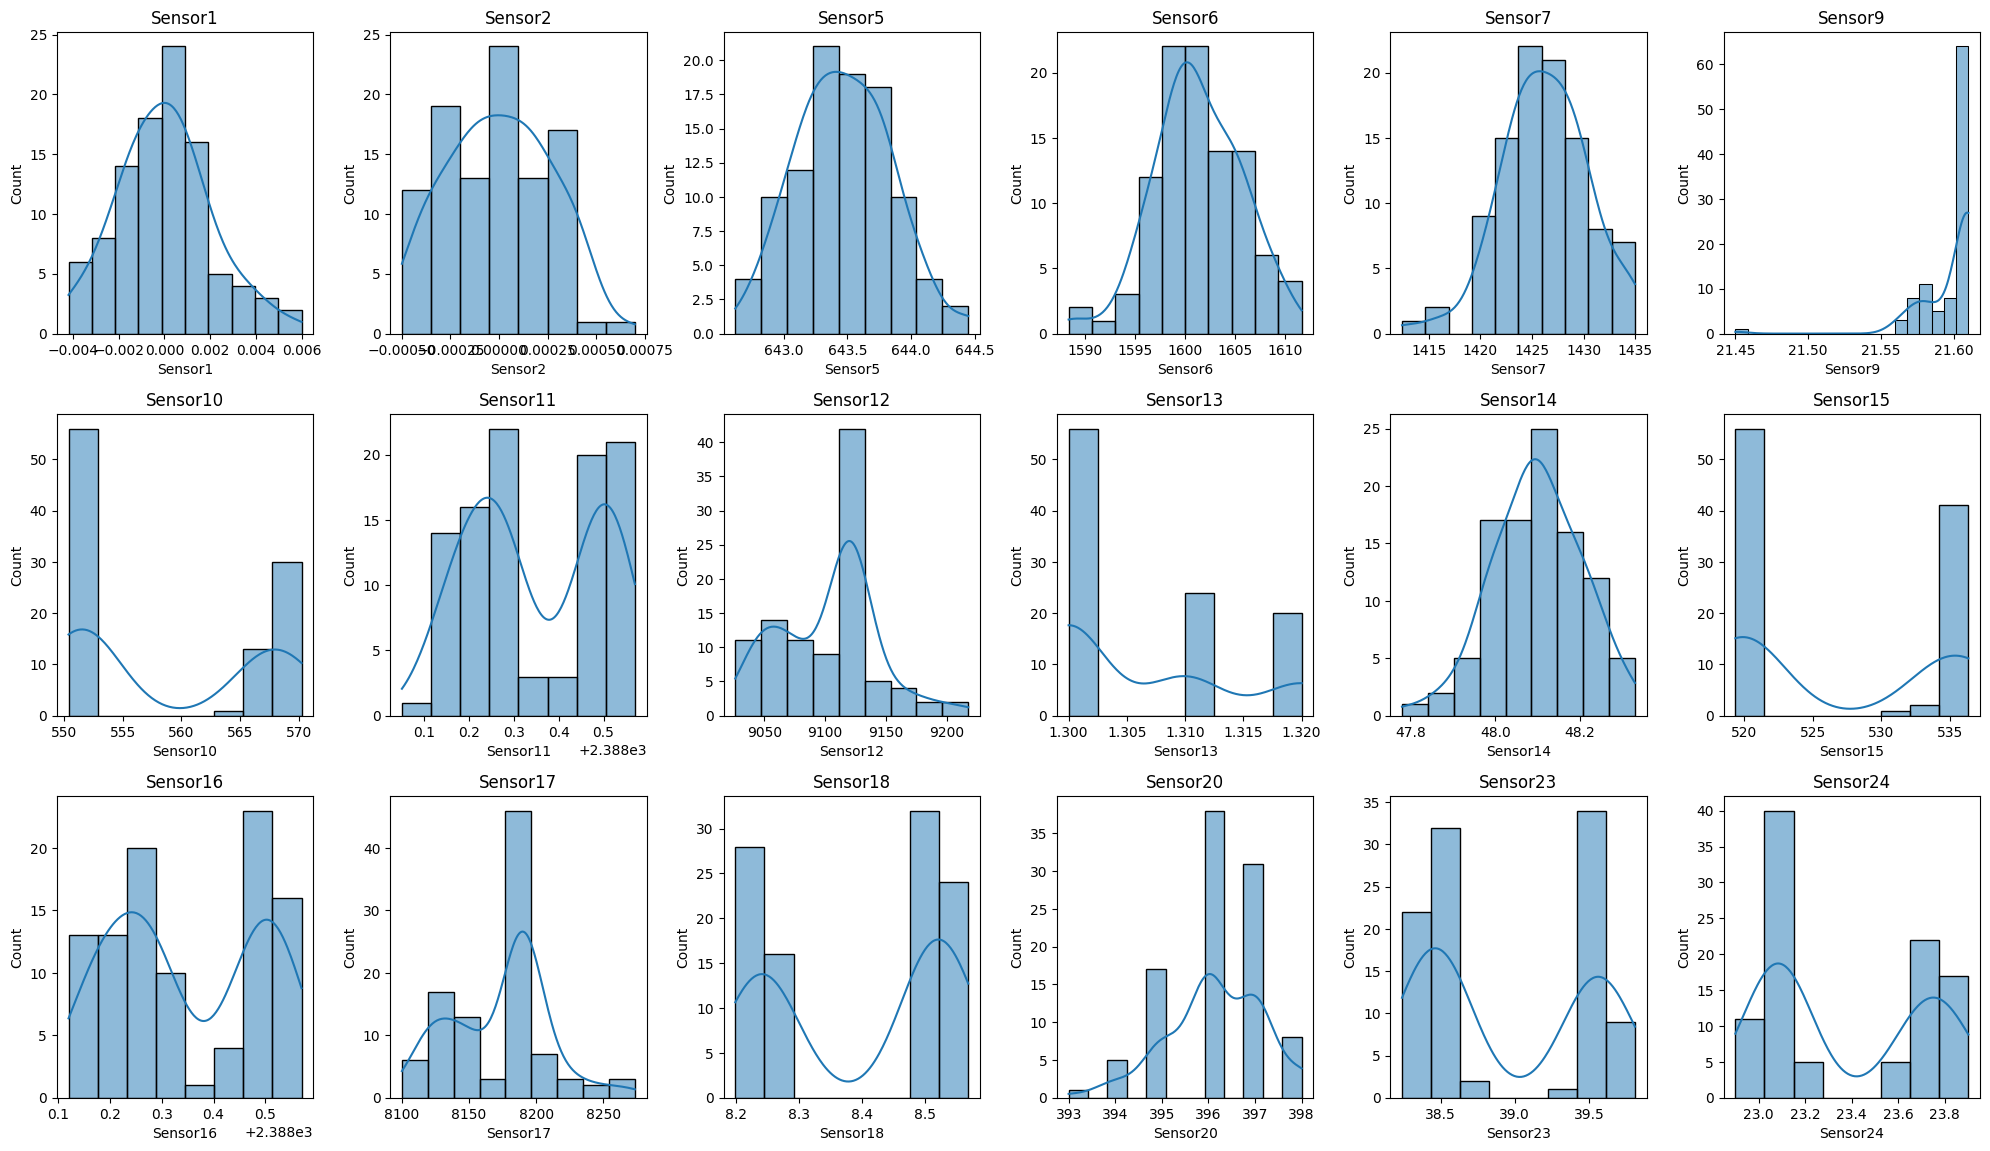

Enter 'c' to continue, 'q' to quit exploring group 3: c
Group: Remaining Cycles = 4, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  243.20000    0.000127    0.000023  643.449100  1601.339700   
std     29.011492   86.48384    0.002139    0.000324    0.369329     4.150674   
min      1.000000  141.00000   -0.005100   -0.000500  642.520000  1590.330000   
25%     25.750000  185.75000   -0.001525   -0.000225  643.157500  1598.832500   
50%     50.500000  216.50000    0.000500    0.000000  643.440000  1601.730000   
75%     75.250000  275.75000    0.001500    0.000300  643.715000  1603.917500   
max    100.000000  521.00000    0.005300    0.000600  644.400000  1612.280000   

           Sensor7    Sensor9   Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.00000  100.00000   100.000000  ...  100.000000   
mean   1425.432400   21.59

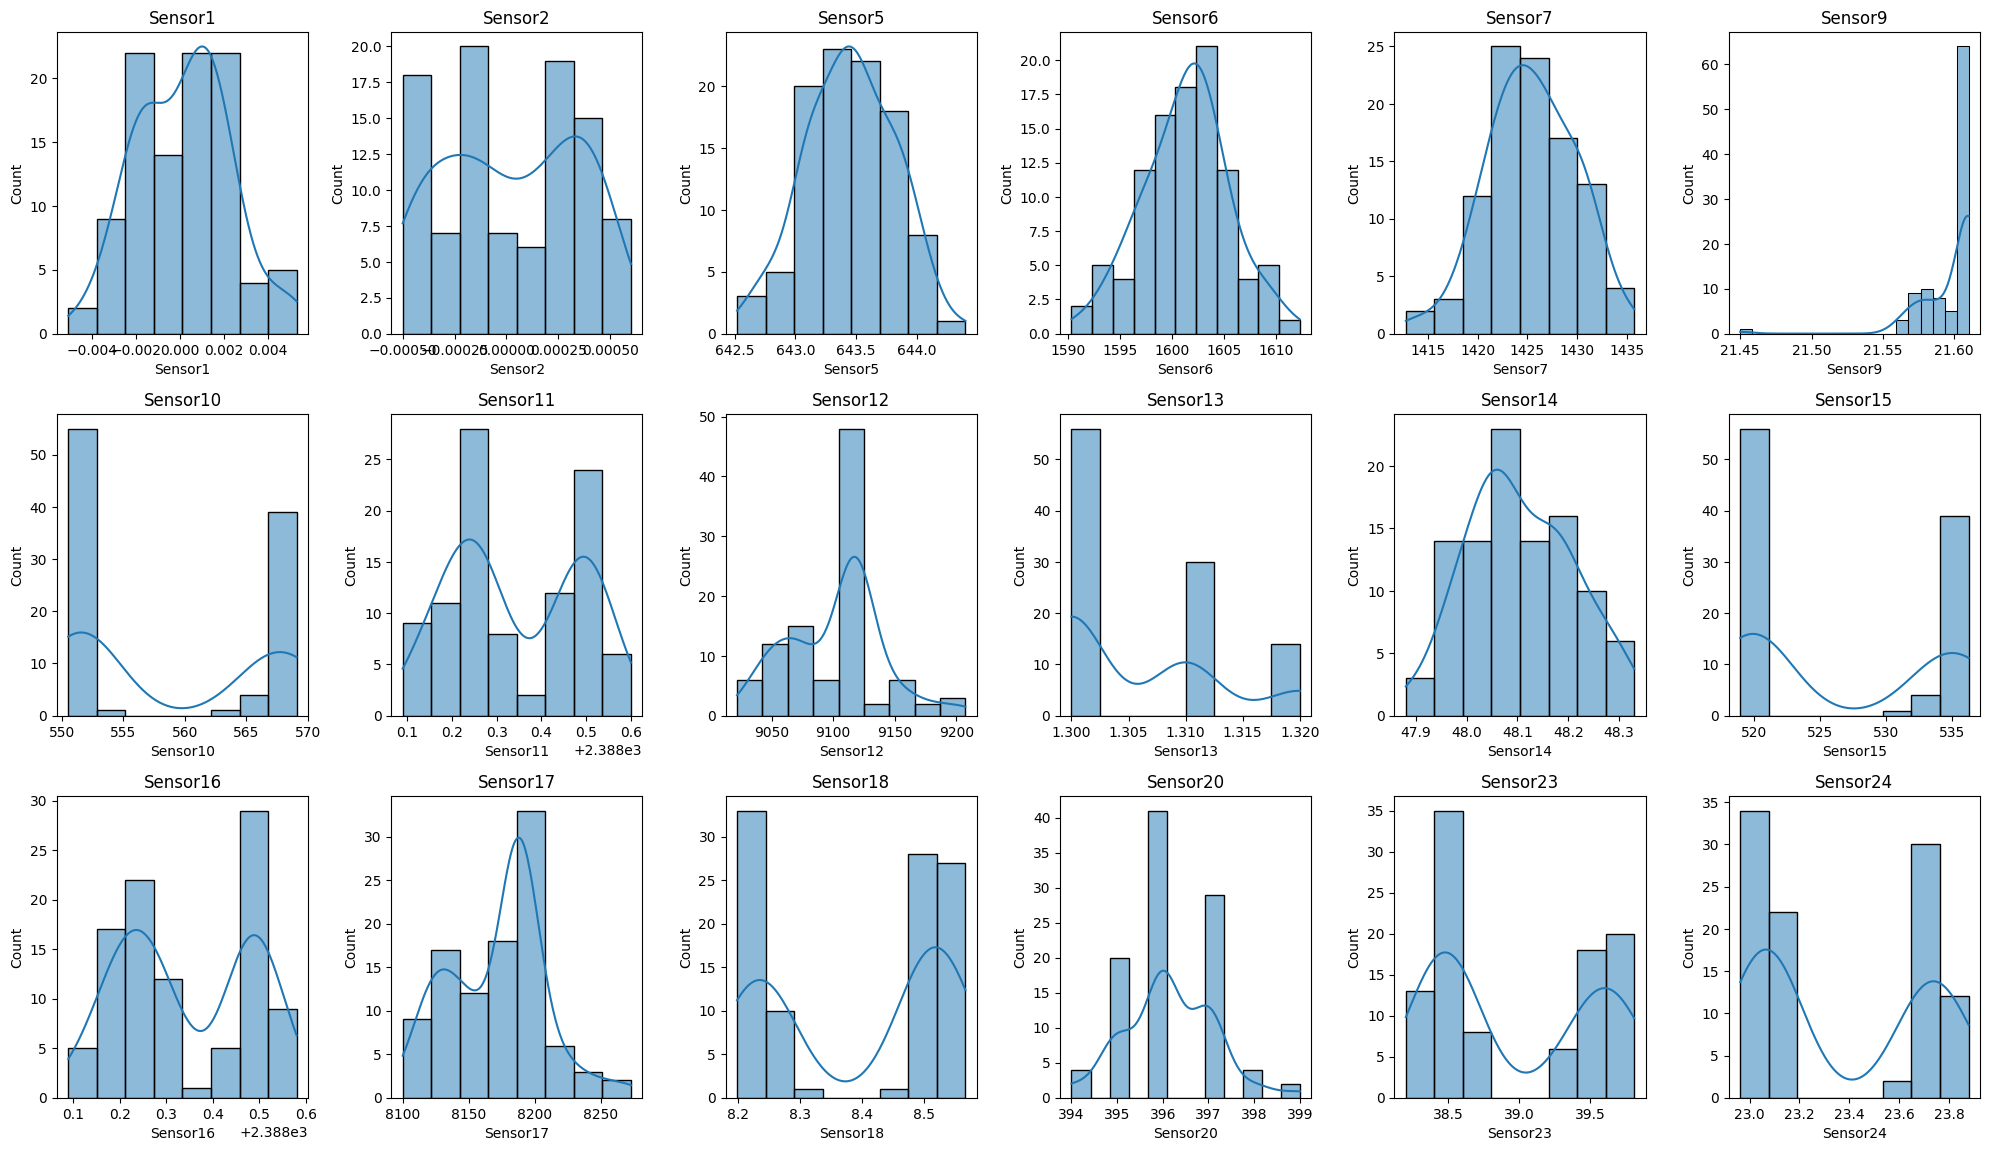

Enter 'c' to continue, 'q' to quit exploring group 4: c
Group: Remaining Cycles = 5, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  242.20000    0.000335   -0.000004  643.425500  1601.153600   
std     29.011492   86.48384    0.002199    0.000312    0.363736     3.532211   
min      1.000000  140.00000   -0.005600   -0.000500  642.470000  1590.300000   
25%     25.750000  184.75000   -0.001025   -0.000300  643.150000  1599.345000   
50%     50.500000  215.50000    0.000450    0.000000  643.435000  1601.460000   
75%     75.250000  274.75000    0.001500    0.000300  643.682500  1603.455000   
max    100.000000  520.00000    0.006400    0.000500  644.170000  1609.270000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1424.541300   2

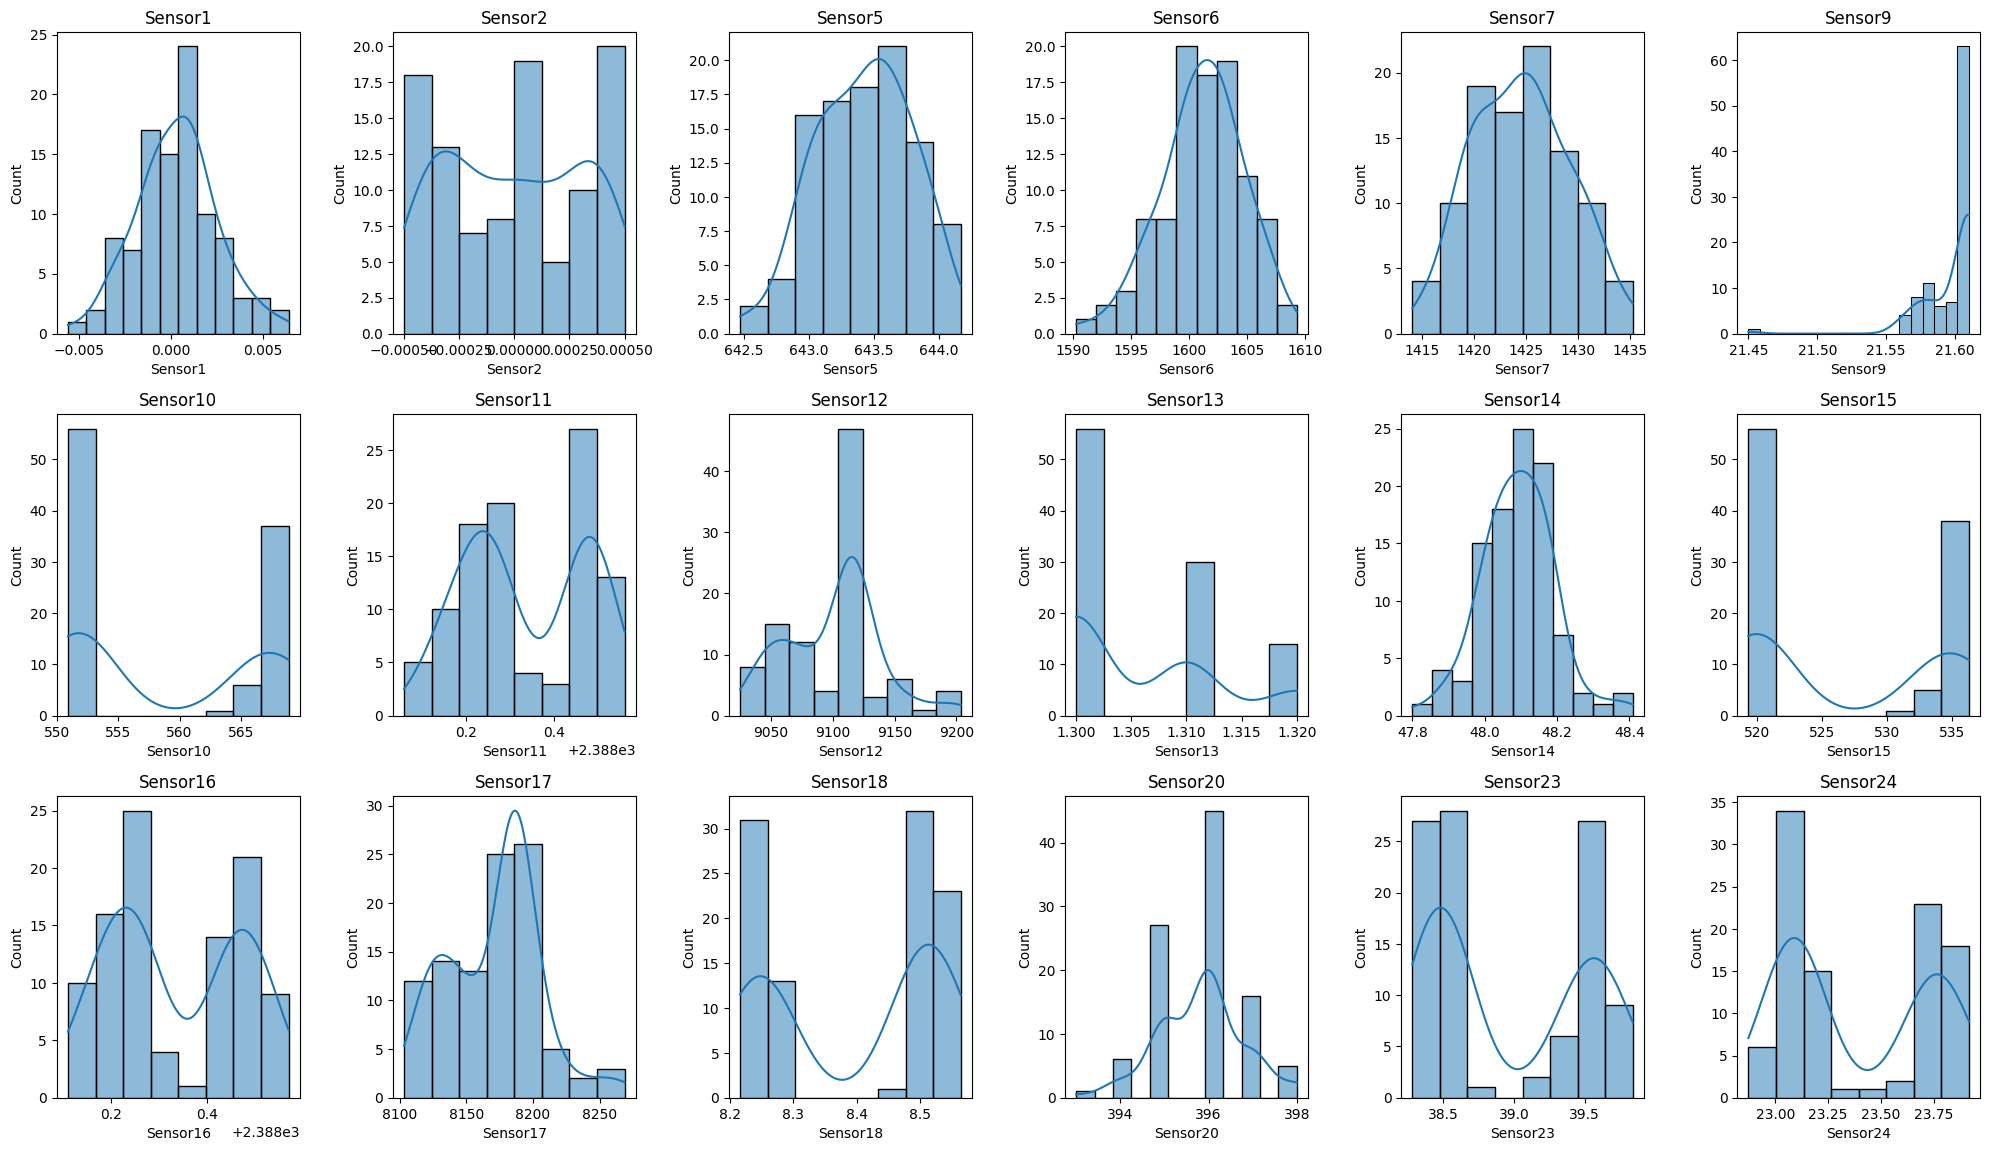

Enter 'c' to continue, 'q' to quit exploring group 5: c
Group: Remaining Cycles = 6, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  241.20000    0.000407   -0.000005  643.319100  1600.692500   
std     29.011492   86.48384    0.002069    0.000281    0.309536     3.814941   
min      1.000000  139.00000   -0.004200   -0.000500  642.580000  1592.660000   
25%     25.750000  183.75000   -0.001100   -0.000200  643.145000  1598.035000   
50%     50.500000  214.50000    0.000350    0.000000  643.310000  1600.410000   
75%     75.250000  273.75000    0.001850    0.000200  643.482500  1603.912500   
max    100.000000  519.00000    0.004800    0.000600  644.230000  1608.660000   

           Sensor7     Sensor9    Sensor10    Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.00000  ...  100.000000   
mean   1424.392100   21.

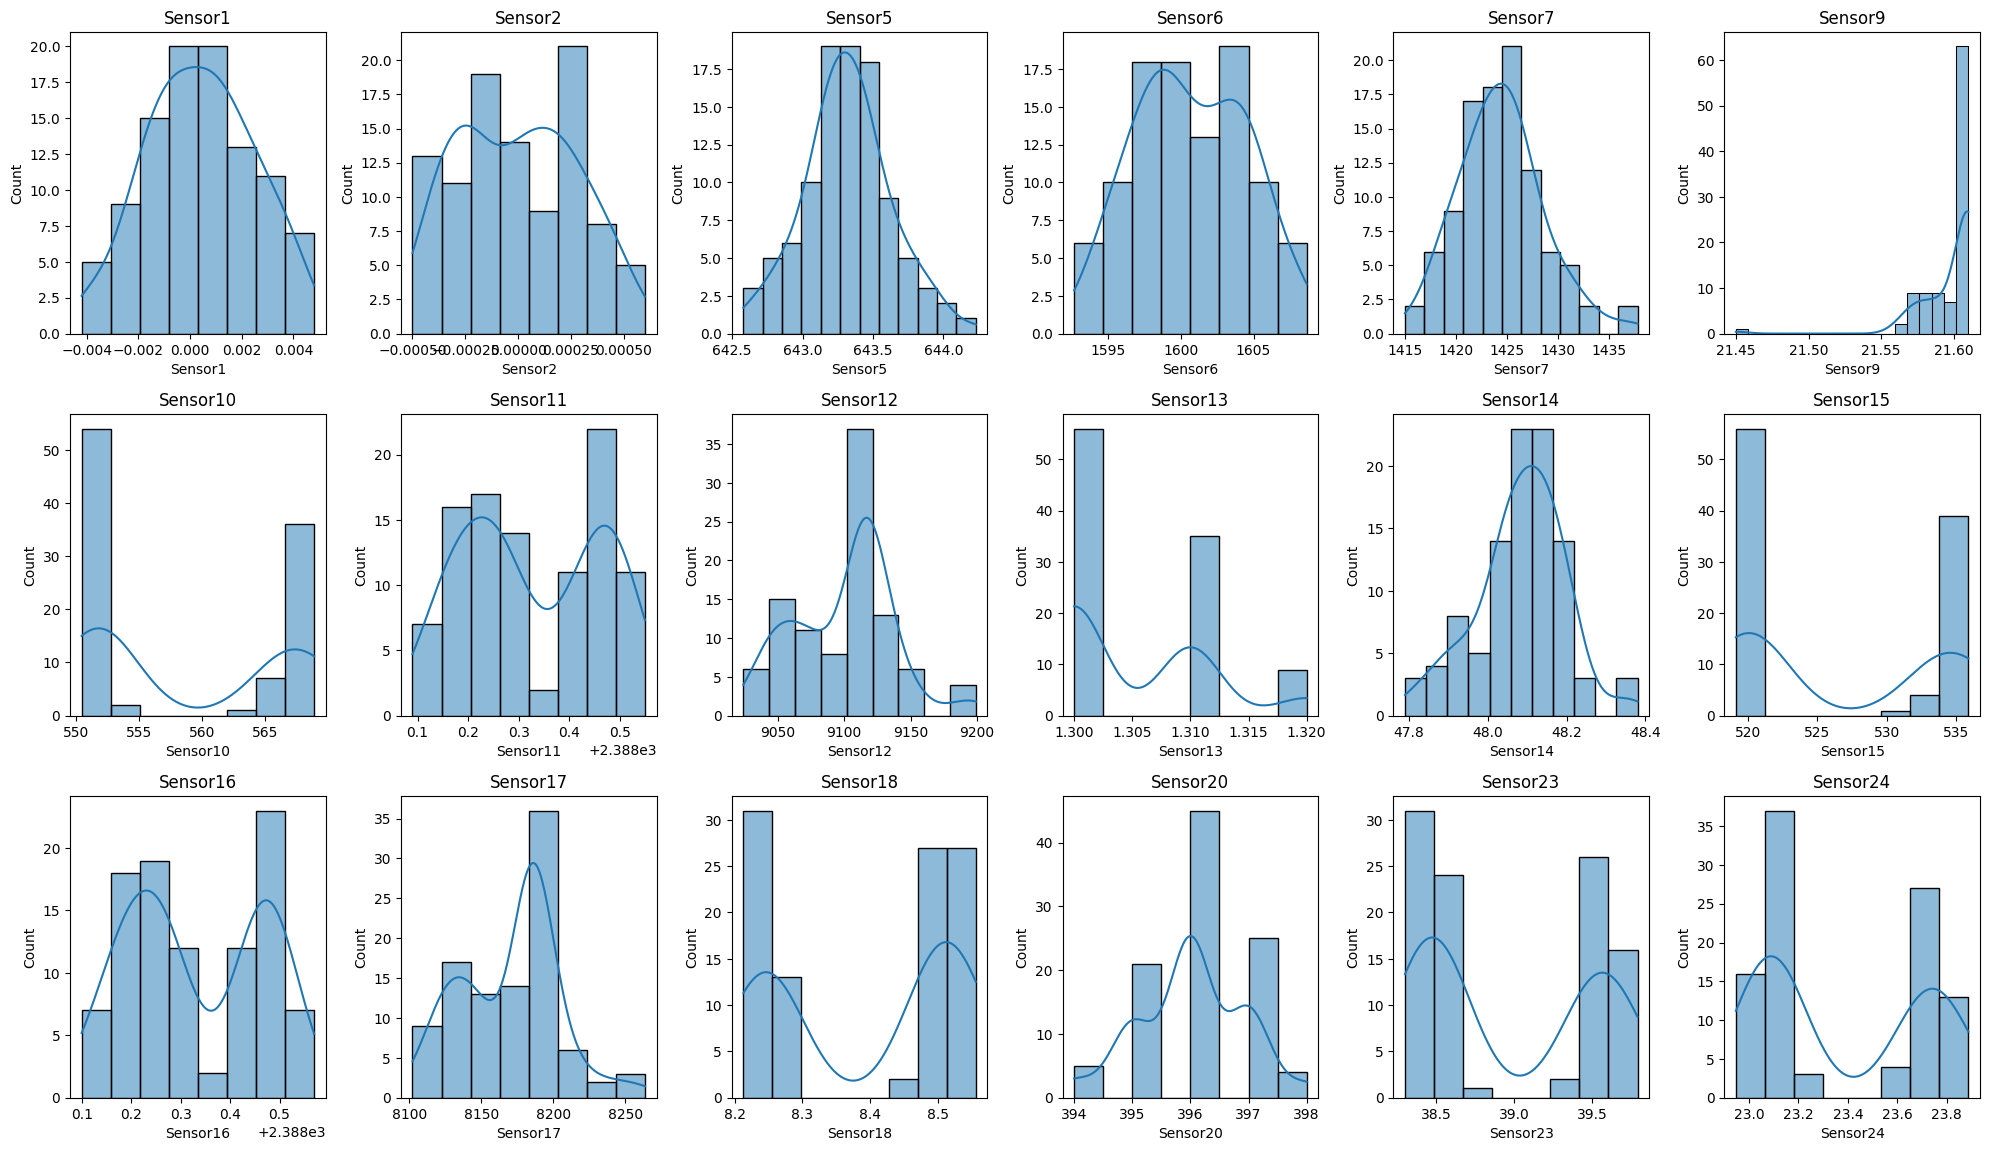

Enter 'c' to continue, 'q' to quit exploring group 6: c
Group: Remaining Cycles = 7, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  240.20000    0.000007    0.000013  643.401400  1600.497400   
std     29.011492   86.48384    0.002063    0.000343    0.369162     4.314174   
min      1.000000  138.00000   -0.005000   -0.000500  642.480000  1590.780000   
25%     25.750000  182.75000   -0.001025   -0.000300  643.157500  1596.857500   
50%     50.500000  213.50000   -0.000050    0.000000  643.395000  1601.095000   
75%     75.250000  272.75000    0.001100    0.000300  643.622500  1603.627500   
max    100.000000  518.00000    0.005800    0.000500  644.370000  1608.590000   

           Sensor7    Sensor9    Sensor10     Sensor11  ...   Sensor13  \
count   100.000000  100.00000  100.000000   100.000000  ...  100.00000   
mean   1423.979900   21.59

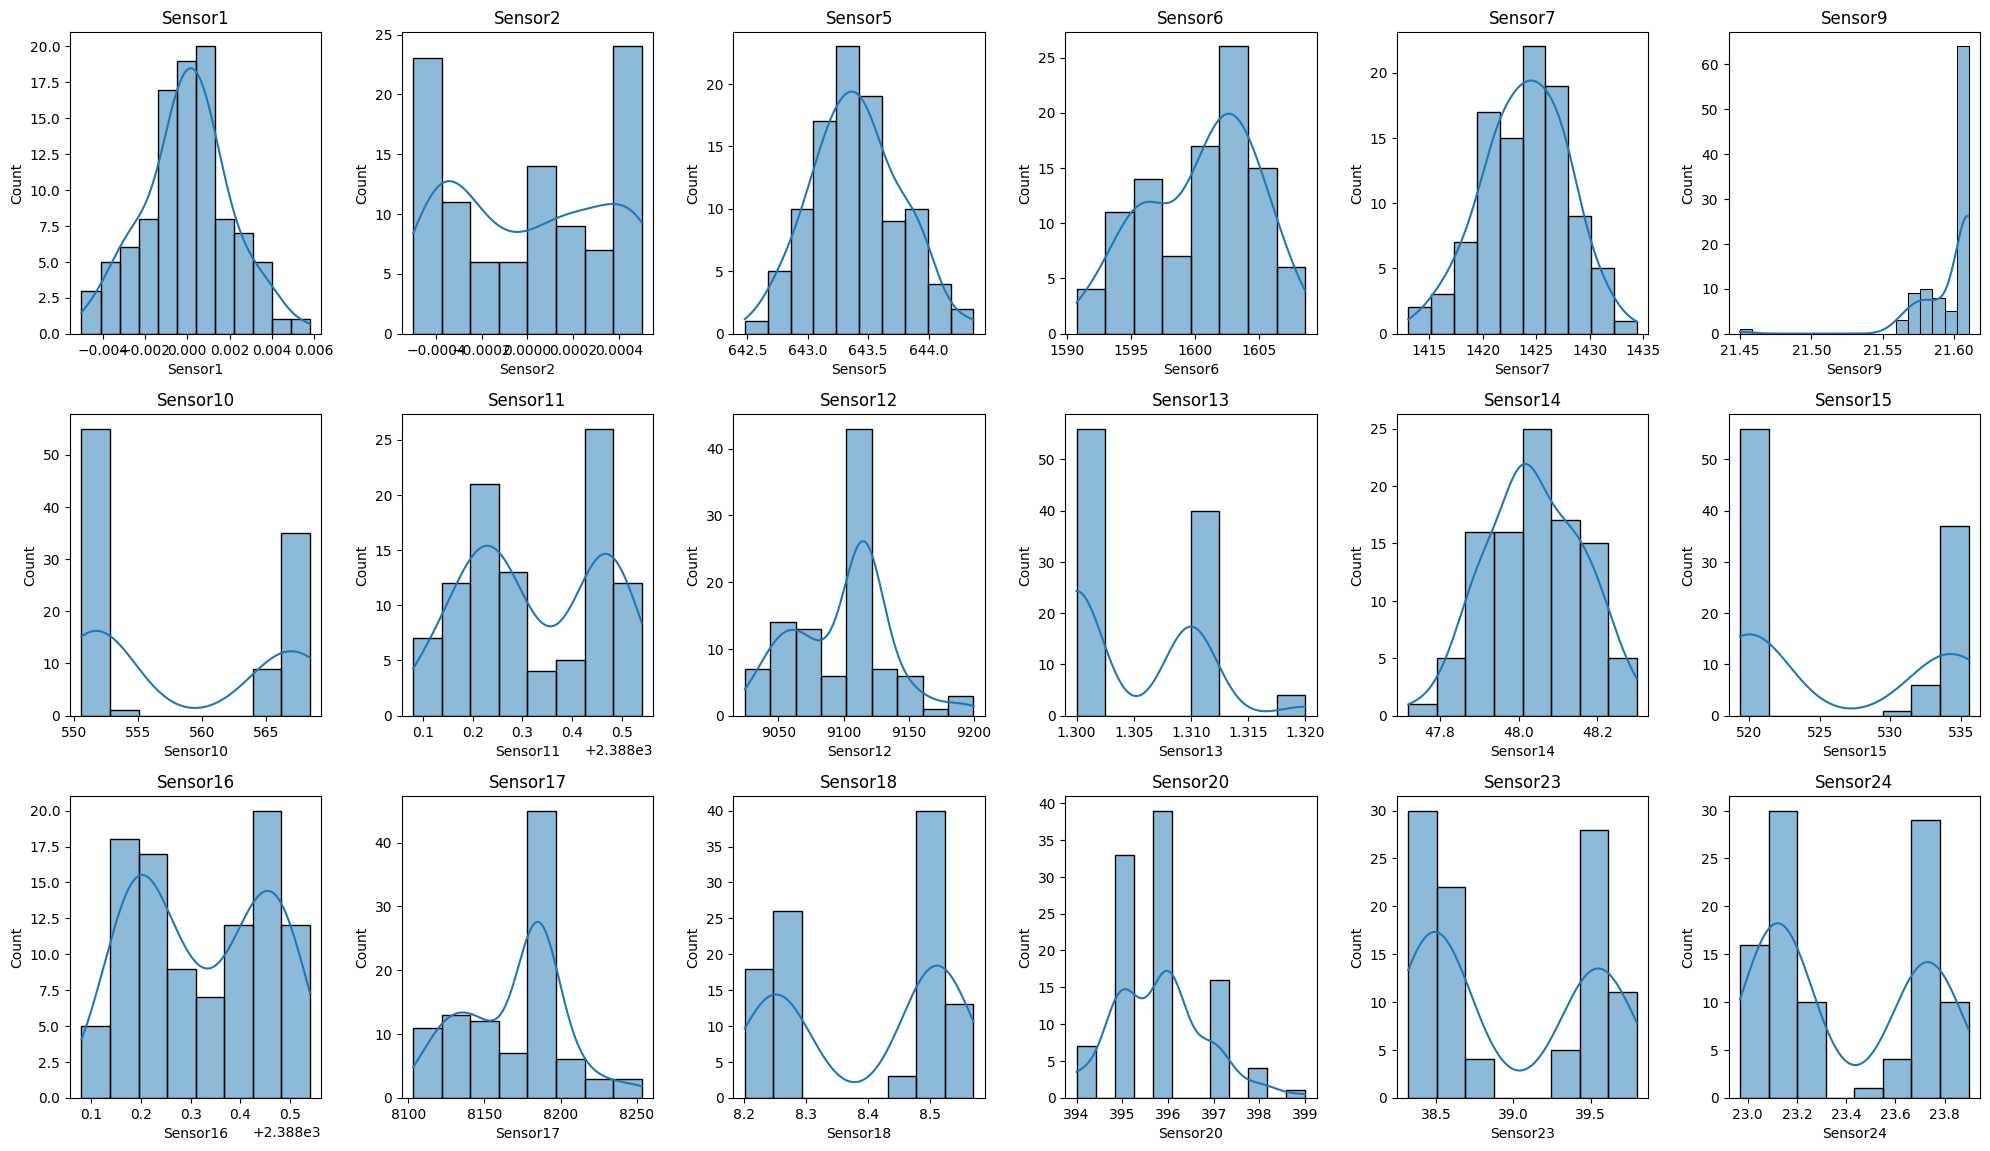

Enter 'c' to continue, 'q' to quit exploring group 7: c
Group: Remaining Cycles = 8, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  239.20000    0.000246    0.000012  643.361500  1599.980000   
std     29.011492   86.48384    0.001971    0.000293    0.339454     3.599277   
min      1.000000  137.00000   -0.006700   -0.000500  642.640000  1589.970000   
25%     25.750000  181.75000   -0.001000   -0.000200  643.150000  1597.840000   
50%     50.500000  212.50000    0.000400    0.000000  643.355000  1599.675000   
75%     75.250000  271.75000    0.001600    0.000300  643.580000  1602.272500   
max    100.000000  517.00000    0.003700    0.000600  644.160000  1608.470000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1424.074300   2

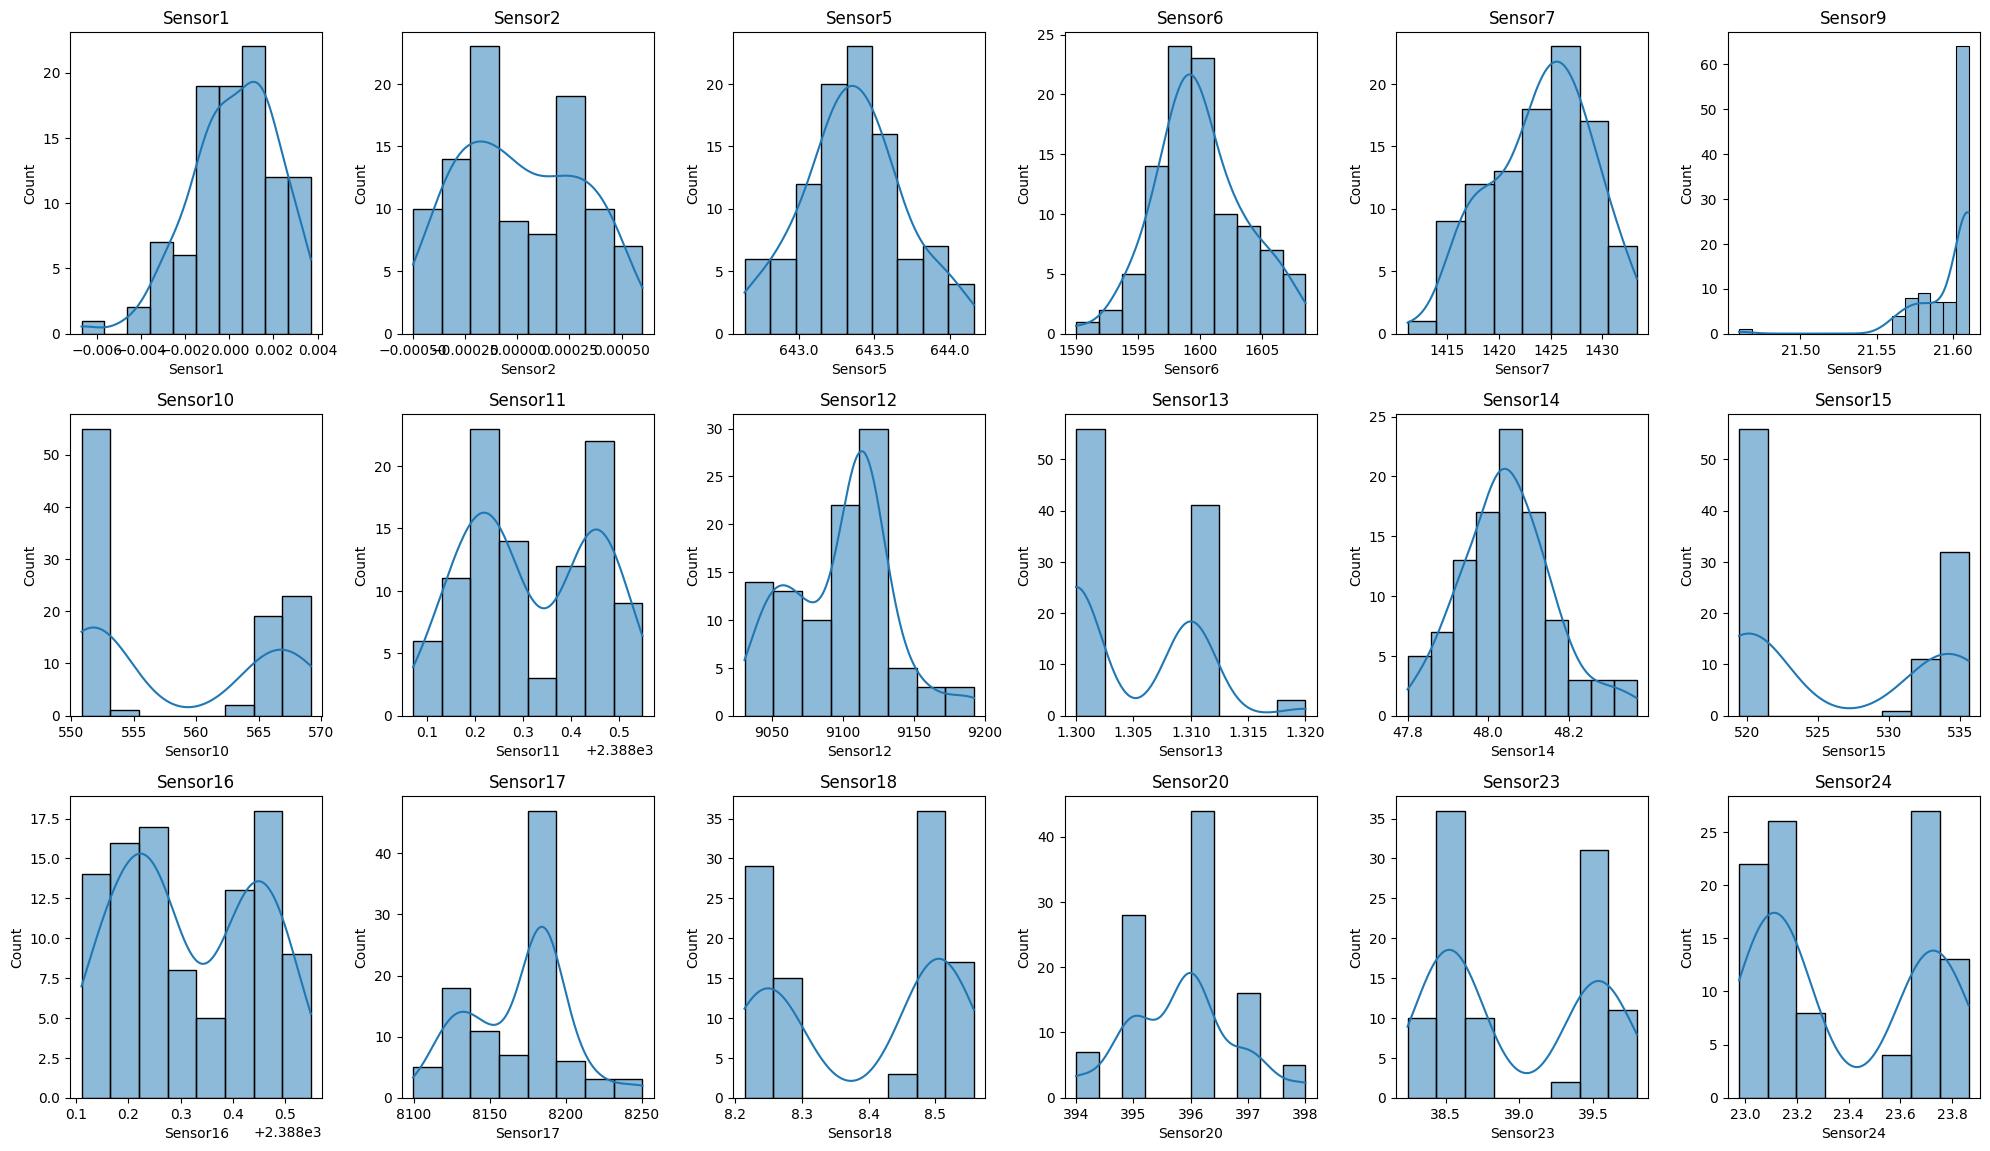

Enter 'c' to continue, 'q' to quit exploring group 8: c
Group: Remaining Cycles = 9, Size = 100
           Engine     Cycles     Sensor1     Sensor2    Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.00000   100.000000   
mean    50.500000  238.20000    0.000230    0.000038  643.31280  1599.656400   
std     29.011492   86.48384    0.002174    0.000265    0.36449     4.273866   
min      1.000000  136.00000   -0.005700   -0.000500  642.28000  1587.450000   
25%     25.750000  180.75000   -0.001125   -0.000125  643.08250  1597.077500   
50%     50.500000  211.50000    0.000300    0.000000  643.27000  1599.135000   
75%     75.250000  270.75000    0.001600    0.000200  643.53250  1602.587500   
max    100.000000  516.00000    0.006000    0.000500  644.24000  1611.330000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1423.245700   21.598400 

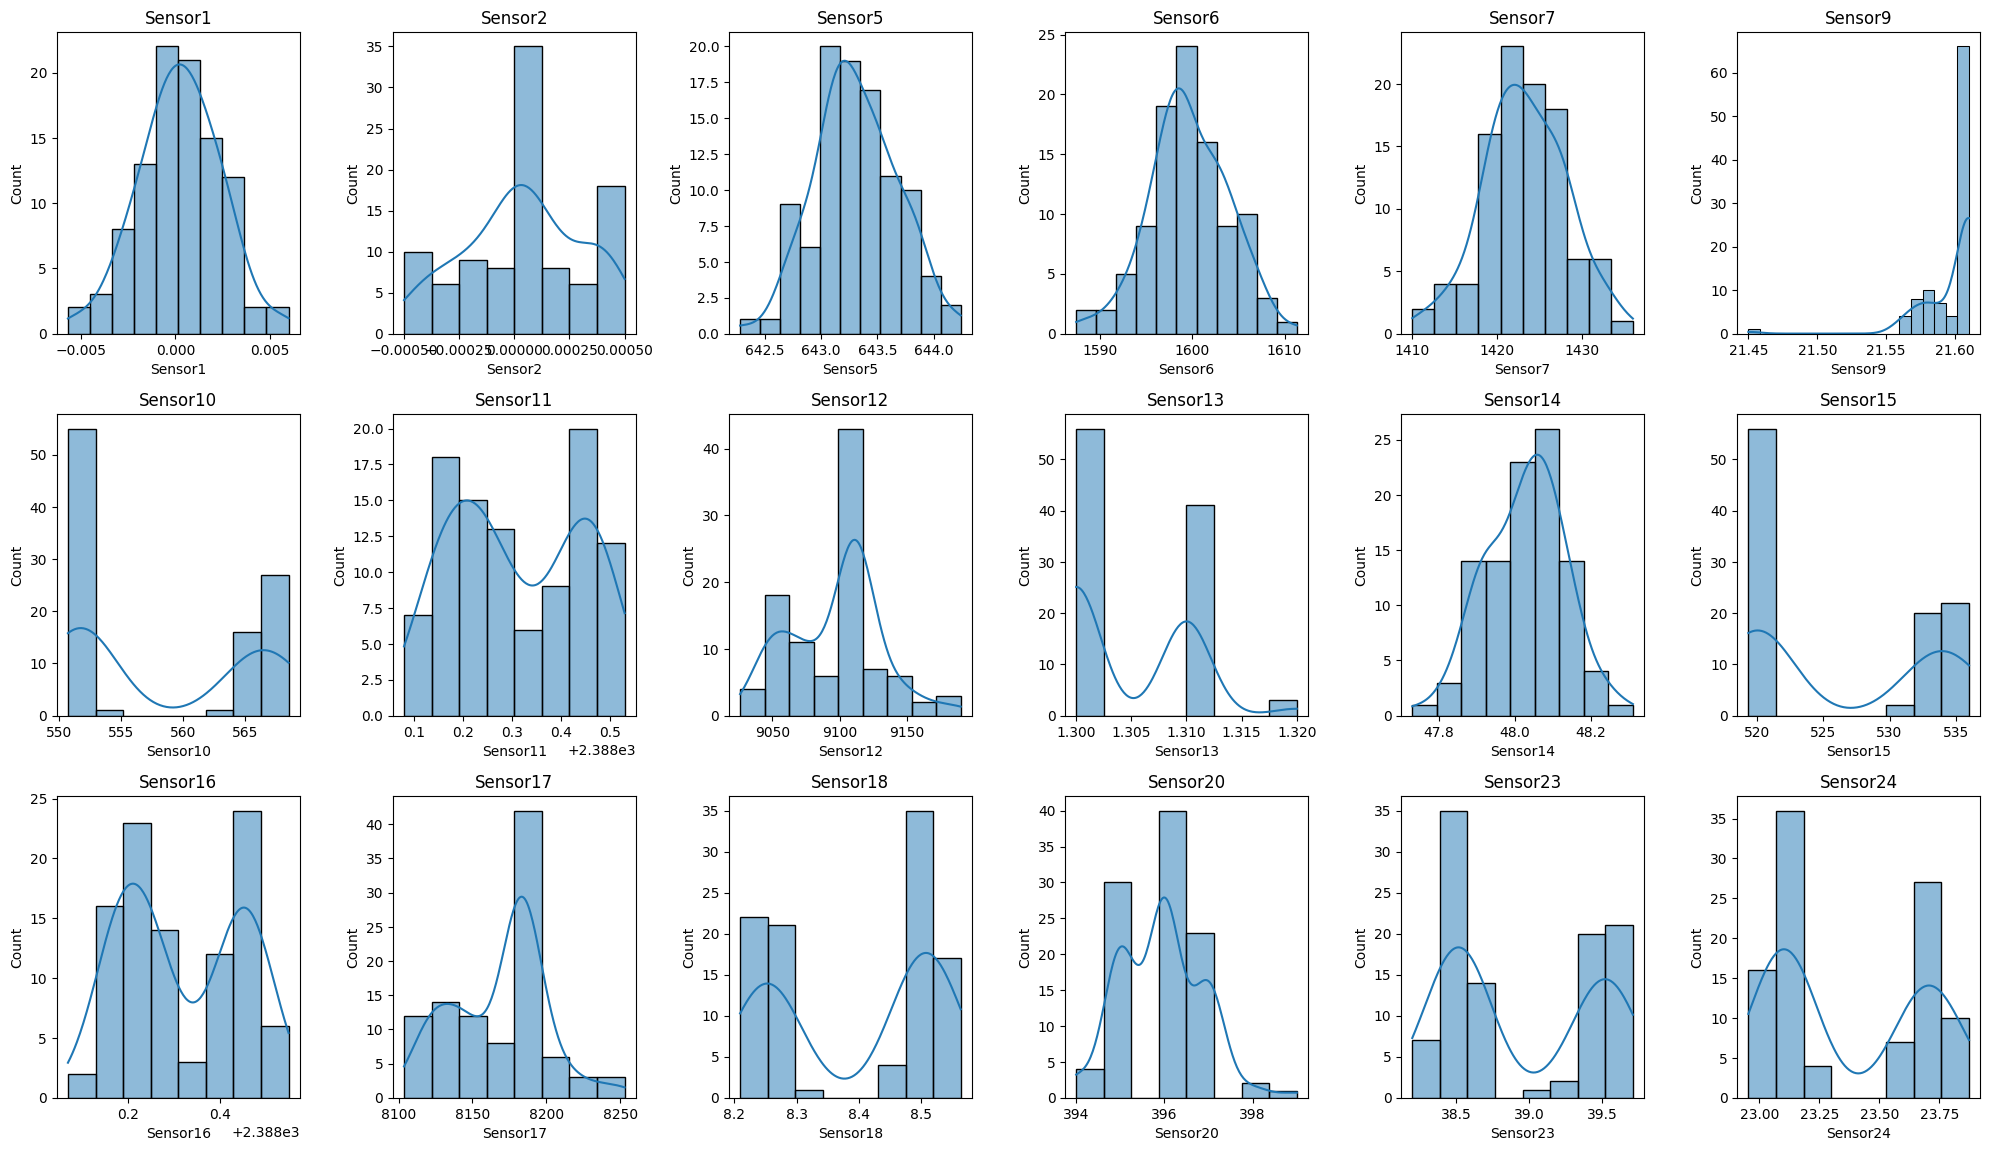

Enter 'c' to continue, 'q' to quit exploring group 9: c
Group: Remaining Cycles = 10, Size = 100
           Engine     Cycles     Sensor1     Sensor2     Sensor5      Sensor6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000  237.20000   -0.000129   -0.000012  643.341000  1599.389300   
std     29.011492   86.48384    0.002132    0.000288    0.376291     4.785043   
min      1.000000  135.00000   -0.008600   -0.000500  642.590000  1586.520000   
25%     25.750000  179.75000   -0.001225   -0.000225  643.060000  1595.535000   
50%     50.500000  210.50000   -0.000100   -0.000050  643.330000  1599.530000   
75%     75.250000  269.75000    0.001300    0.000300  643.620000  1602.745000   
max    100.000000  515.00000    0.005600    0.000500  644.360000  1609.620000   

           Sensor7     Sensor9    Sensor10     Sensor11  ...    Sensor13  \
count   100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean   1422.722000   

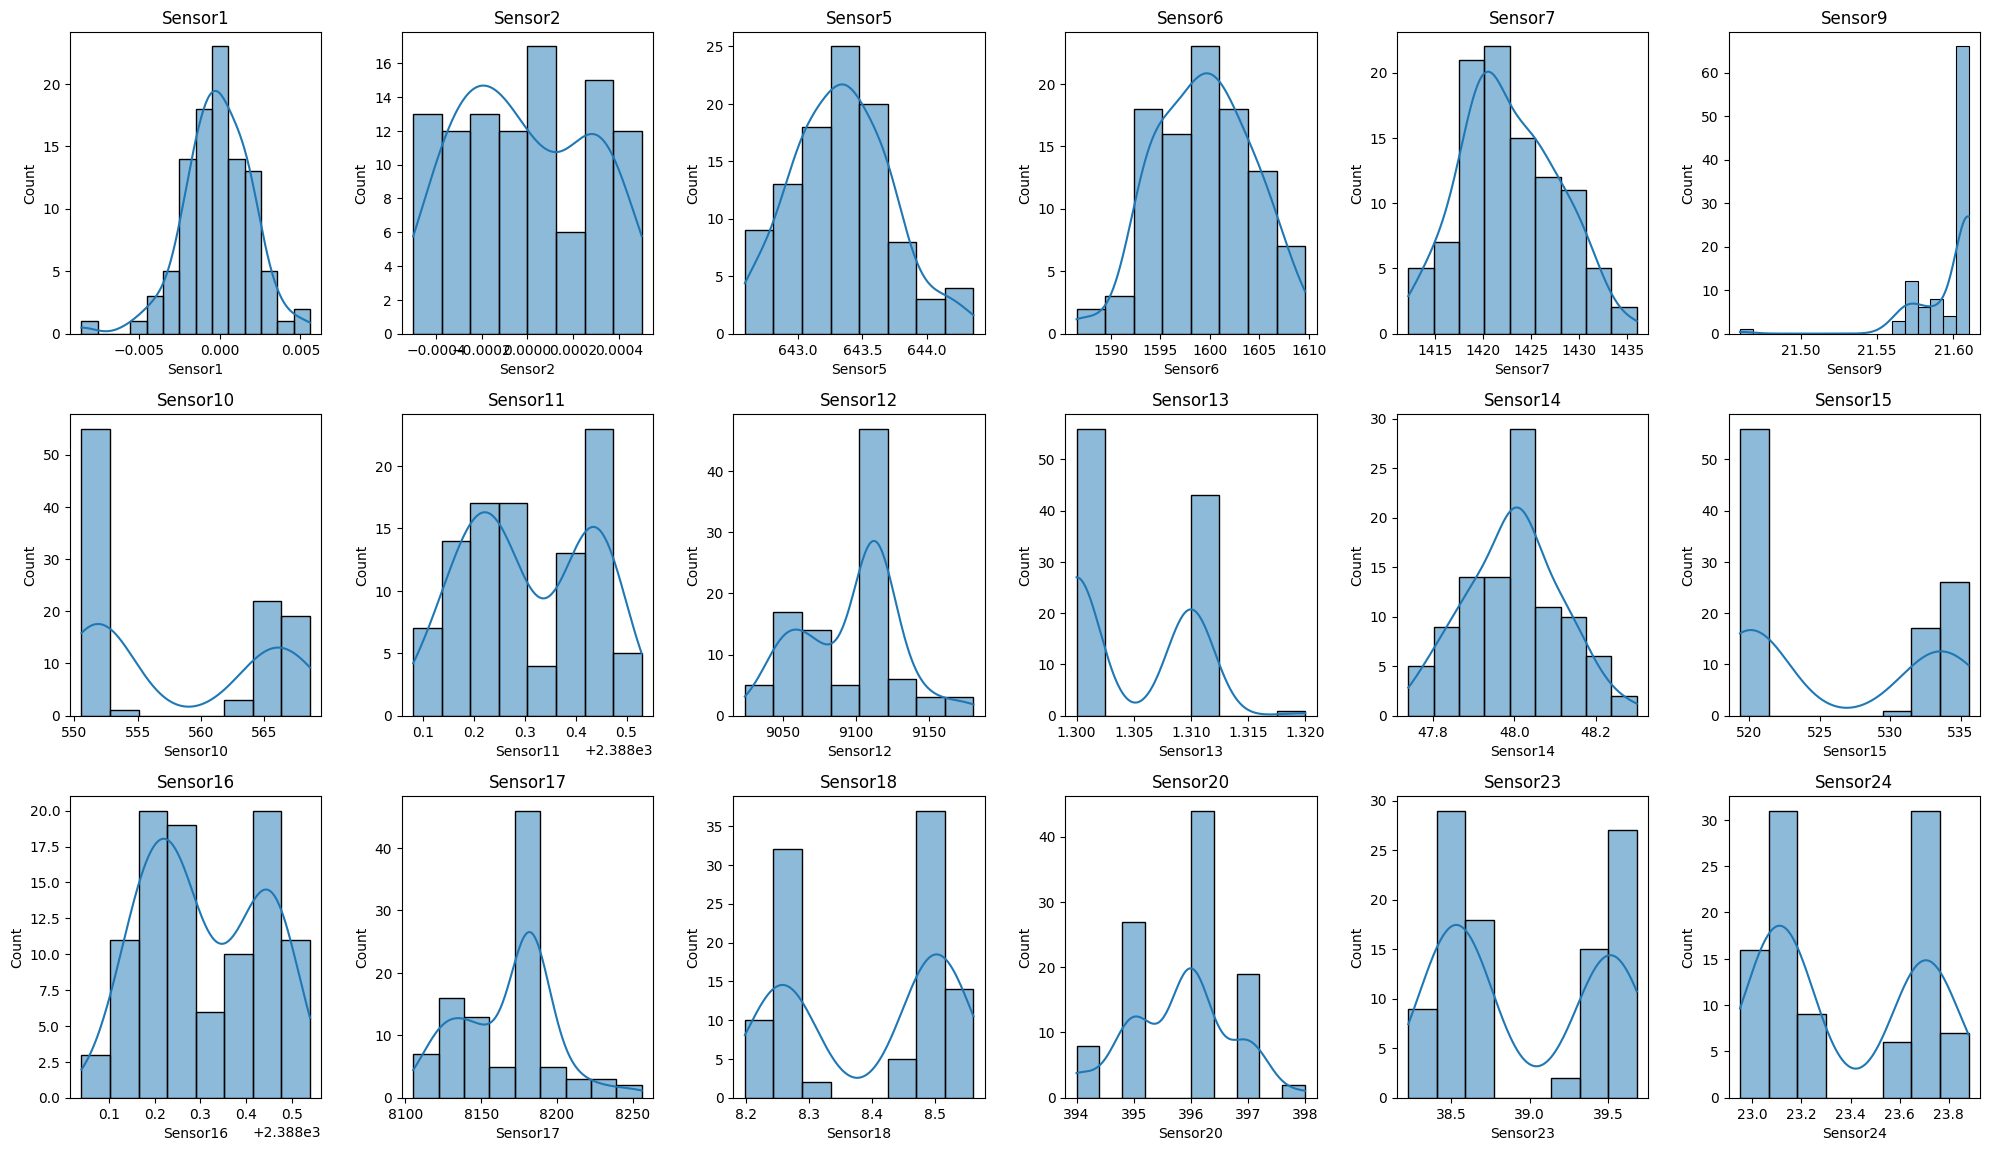

Enter 'c' to continue, 'q' to quit exploring group 10: q


In [16]:
# Group data by Remaining Cycles & explore sensor distributions
remaining_cycles_groups = data.groupby('Remaining Cycles')

# Threshold for selecting groups
threshold = 10 

# Filter groups based on the threshold
selected_groups = [(group_name, group_data) for group_name, group_data in remaining_cycles_groups if len(group_data) >= threshold]

# Explore the selected groups
for group_name, group_data in selected_groups:
    print(f"Group: Remaining Cycles = {group_name}, Size = {len(group_data)}")
    print(group_data.describe())

    plt.figure(figsize=(20, 15))
    for i, col in enumerate(group_data.columns[2:-1]):
        plt.subplot(4, 6, i+1)
        sns.histplot(group_data[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

    user_input = input(f"Enter 'c' to continue, 'q' to quit exploring group {group_name}: ")
    if user_input.lower() == 'q':
        break